In [1]:
# interacting residues, only intenergysum columns as predictors

In [2]:
import pandas as pd
import numpy as np
import coclust

In [3]:
from sklearn.preprocessing import LabelEncoder

## COCLUST (int. residues)

In [5]:
import pickle

# read in filled ml_df for plotting
ml_df = pd.read_pickle('pickles/ml_df_filled_intresidues_intenergysums_nonscaled.pkl')

# keep only intenergysum columns
for col in ml_df.columns:
    if 'intenergysum' not in col:
        ml_df.drop([col], axis = 1, inplace = True)
        
#ml_df.fillna(999, inplace = True)
        
display(ml_df)

7EW2_intenergysum 7EW3_intenergysum 7EW4_intenergysum 7EW1_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
194                 0                 0                 0                 0   
195                 0                 0                 0                 0   
196                 0                 0                 0                 0   
197               0.0               0.0               0.0               0.0   
198               0.0               0.0               0.0               0.0   

    7LD4_intenergysum 7LD3_intenergysum 7RM5_intenergysum 7M8W_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
194                 0                 0                 0                 0   
195                 0                 0                 0                 0   
196                 0                 0                 0                 0   
197               0.0               0.0               0.0               0.0   
198               0.0               0.0               0.0               0.0   

    7DB6_intenergysum 7EXD_intenergysum  ... 6ZA8_intenergysum  \
0                 0.0               0.0  ...               0.0   
1                 0.0               0.0  ...               0.0   
2                 0.0               0.0  ...               0.0   
3                 0.0               0.0  ...               0.0   
4                 0.0               0.0  ...               0.0   
..                ...               ...  ...               ...   
194                 0                 0  ...                 0   
195                 0                 0  ...                 0   
196                 0                 0  ...                 0   
197               0.0               0.0  ...               0.0   
198               0.0               0.0  ...               0.0   

    5T04_intenergysum 4XEE_intenergysum 4XES_intenergysum 4GRV_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
194                 0                 0                 0                 0   
195                 0                 0                 0                 0   
196                 0                 0                 0                 0   
197               0.0               0.0               0.0               0.0   
198               0.0               0.0               0.0               0.0   

    5C1M_intenergysum 4EJ4_intenergysum 4DKL_intenergysum 6Z10_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               NaN               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0         

In [121]:
resnums = list(pd.read_pickle('pickles/y_intresidues.pkl'))
y = list(pd.read_pickle('pickles/y_intresidues.pkl'))

In [122]:
ml_df['7EW2_intenergysum'].value_counts()

 0.000000    97
-2.300000     1
-0.200000     1
-1.133249     1
-6.744811     1
-0.100000     1
Name: 7EW2_intenergysum, dtype: int64

In [123]:
len(resnums)

114

In [124]:
from sklearn.impute import SimpleImputer

# data imputation
X = ml_df.copy()
my_imputer = SimpleImputer()
X = pd.DataFrame(my_imputer.fit_transform(X))

#data scaling from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
to_scale = [col for col in X.columns.values]
scaler.fit(X[to_scale])
X[to_scale] = scaler.transform(X[to_scale])

# predict z-scores on the test set
X[to_scale] = scaler.transform(X[to_scale]) 

In [125]:
display(X)

0         1         2         3         4         5         6    \
0    1.146004  1.115160  2.927619  1.514817  1.161779  1.149393  1.176195   
1    1.148262  1.116443  2.927619  1.514817  1.163934  1.151515  1.178571   
2    1.148262  1.116443  2.927619  1.526316  1.163934  1.151515  1.178571   
3    1.148262  1.116443  3.000000  1.526316  1.163934  1.151515  1.178571   
4    1.148262  1.116443  3.000000  1.526316  1.163934  1.151515  1.178571   
..        ...       ...       ...       ...       ...       ...       ...   
109  1.148262  1.116443  3.000000  1.526316  1.161247  1.149219  1.178571   
110  1.148262  1.116443  3.000000  1.526316  1.147810  1.151515  1.178571   
111  1.148262  1.116443  3.000000  1.526316  1.163934  1.151515  1.178571   
112  1.148262  1.116443  3.000000  1.526316  1.163934  1.151515  1.178571   
113  1.148262  1.116443  3.000000  1.526316  1.163934  1.151515  1.178571   

          7          8         9    ...       354  355  356        357  \
0    1.672665  10.816514  1.045792  ...  1.089976  0.0  0.0  10.906542   
1    1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   
2    1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   
3    1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   
4    1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   
..        ...        ...       ...  ...       ...  ...  ...        ...   
109  1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   
110  1.689004  11.000000  1.045833  ...  1.092383  0.0  0.0  11.000000   
111  1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   
112  1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   
113  1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   

          358       359       360       361       362       363  
0    4.302181  1.054452  1.067231  0.997168  1.100308  1.042002  
1    4.333333  1.055098  1.067231  0.997650  1.100308  1.042002  
2    4.333333  1.055098  1.067231  0.997650  1.100308  1.000000  
3    4.333333  1.055098  1.067231  0.997650  1.100308  1.042002  
4    4.333333  1.055098  1.067231  0.997650  1.100308  1.042002  
..        ...       ...       ...       ...       ...       ...  
109  4.333333  1.055098  1.067231  0.997650  1.100308  1.042002  
110  4.333333  1.054794  1.067231  0.997180  1.100308  1.042002  
111  4.333333  1.055098  1.067231  0.997650  1.100308  1.042002  
112  4.333333  1.055098  1.067231  0.997650  1.100308  1.042002  
113  4.333333  1.055098  1.067231  0.997650  1.100308  1.042002  

[114 rows x 364 columns]

In [126]:
import coclust
from coclust.visualization import (plot_reorganized_matrix, plot_cluster_top_terms, plot_max_modularities)
from coclust.evaluation.internal import best_modularity_partition
from coclust.coclustering import CoclustMod, CoclustSpecMod
from coclust.visualization import plot_cluster_sizes

In [127]:
X.values.shape

(114, 364)

Computing coclust modularity for a range of cluster numbers =
 2 ...
 3 ...
 4 ...
 5 ...
 6 ...
 7 ...
 8 ...
 9 ...
 10 ...
 11 ...
 12 ...
 13 ...
 14 ...
 15 ...
 16 ...
 17 ...
 18 ...
 19 ...
 20 ...
 21 ...
 22 ...
 23 ...
 24 ...
 25 ...
 26 ...
 27 ...
 28 ...
 29 ...
 30 ...
 31 ...
 32 ...
 33 ...
 34 ...
 35 ...
 36 ...
 37 ...
 38 ...
 39 ...
 40 ...
 41 ...
 42 ...
 43 ...
 44 ...
 45 ...
 46 ...
 47 ...
 48 ...
 49 ...
 50 ...
 All done !


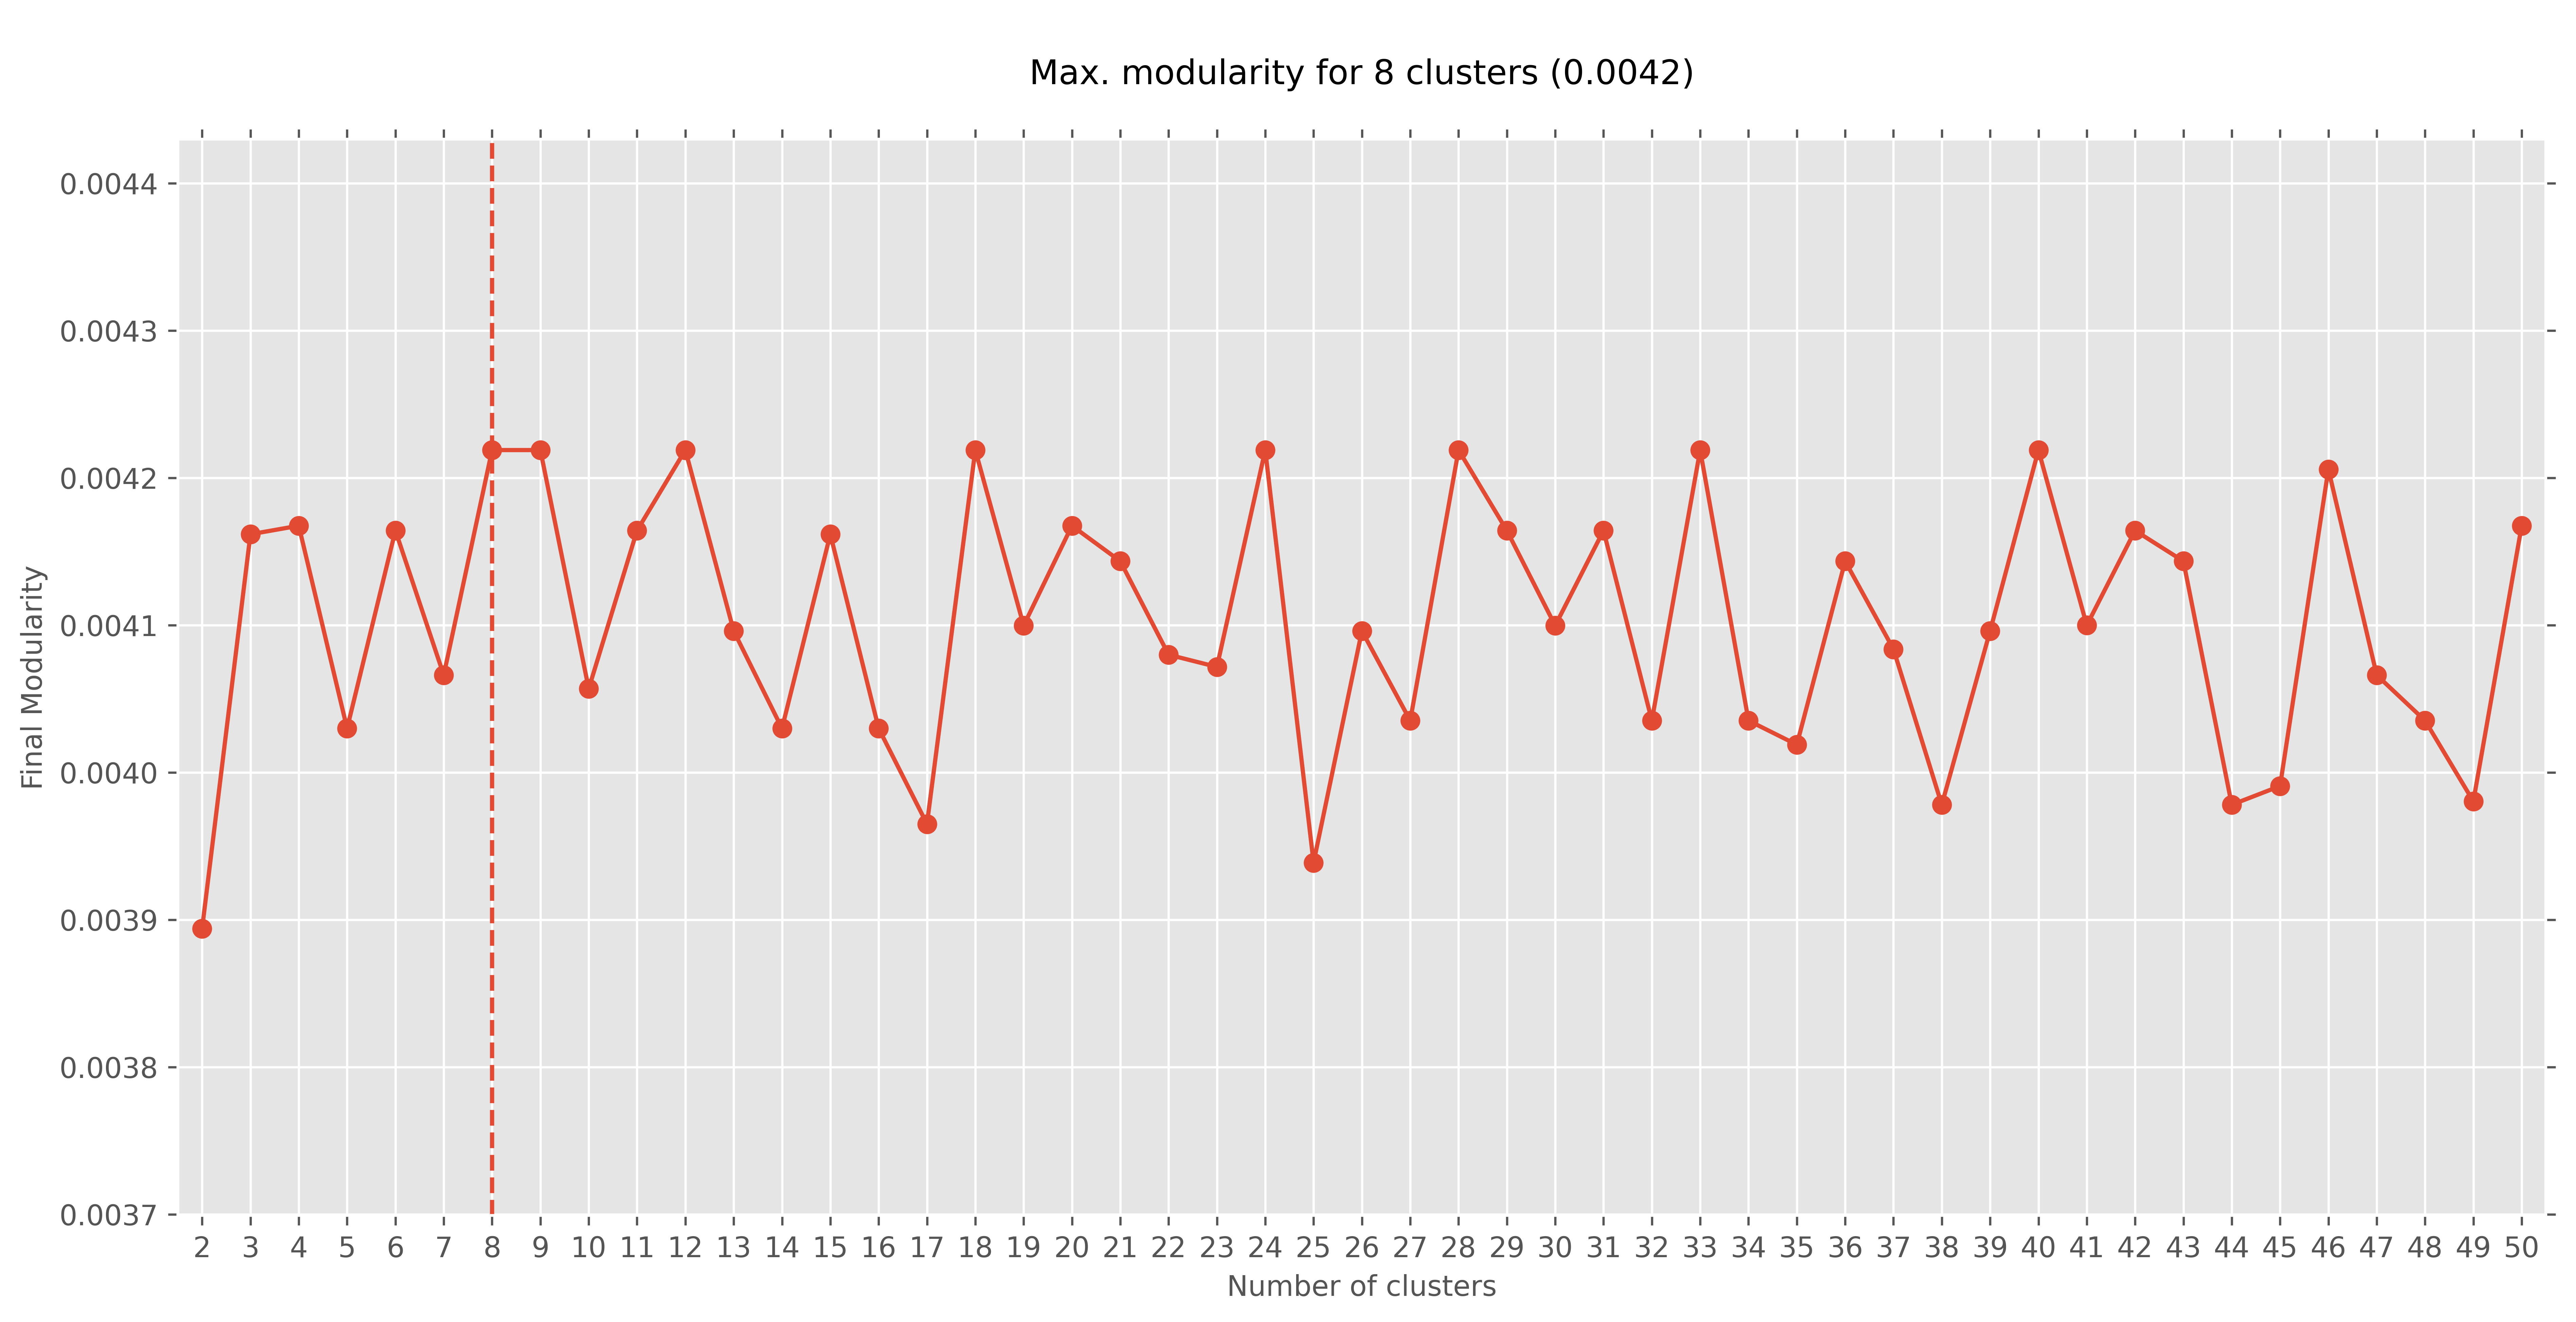

In [128]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 7] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 600 #width, height (both in inches)

# get the best co-clustering over a range of cluster numbers
clusters_range = range(2, 51)
model, modularities = best_modularity_partition(X.values, clusters_range, n_rand_init=1)

plot_max_modularities(modularities, range(2, 52))

In [129]:
i = 2
for mod in modularities:
    if mod == max(modularities):
        print(i)
    i += 1

8
9
12
18
24
28
33
40


In [130]:
X

0         1         2         3         4         5         6    \
0    1.146004  1.115160  2.927619  1.514817  1.161779  1.149393  1.176195   
1    1.148262  1.116443  2.927619  1.514817  1.163934  1.151515  1.178571   
2    1.148262  1.116443  2.927619  1.526316  1.163934  1.151515  1.178571   
3    1.148262  1.116443  3.000000  1.526316  1.163934  1.151515  1.178571   
4    1.148262  1.116443  3.000000  1.526316  1.163934  1.151515  1.178571   
..        ...       ...       ...       ...       ...       ...       ...   
109  1.148262  1.116443  3.000000  1.526316  1.161247  1.149219  1.178571   
110  1.148262  1.116443  3.000000  1.526316  1.147810  1.151515  1.178571   
111  1.148262  1.116443  3.000000  1.526316  1.163934  1.151515  1.178571   
112  1.148262  1.116443  3.000000  1.526316  1.163934  1.151515  1.178571   
113  1.148262  1.116443  3.000000  1.526316  1.163934  1.151515  1.178571   

          7          8         9    ...       354  355  356        357  \
0    1.672665  10.816514  1.045792  ...  1.089976  0.0  0.0  10.906542   
1    1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   
2    1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   
3    1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   
4    1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   
..        ...        ...       ...  ...       ...  ...  ...        ...   
109  1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   
110  1.689004  11.000000  1.045833  ...  1.092383  0.0  0.0  11.000000   
111  1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   
112  1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   
113  1.689004  11.000000  1.046261  ...  1.092383  0.0  0.0  11.000000   

          358       359       360       361       362       363  
0    4.302181  1.054452  1.067231  0.997168  1.100308  1.042002  
1    4.333333  1.055098  1.067231  0.997650  1.100308  1.042002  
2    4.333333  1.055098  1.067231  0.997650  1.100308  1.000000  
3    4.333333  1.055098  1.067231  0.997650  1.100308  1.042002  
4    4.333333  1.055098  1.067231  0.997650  1.100308  1.042002  
..        ...       ...       ...       ...       ...       ...  
109  4.333333  1.055098  1.067231  0.997650  1.100308  1.042002  
110  4.333333  1.054794  1.067231  0.997180  1.100308  1.042002  
111  4.333333  1.055098  1.067231  0.997650  1.100308  1.042002  
112  4.333333  1.055098  1.067231  0.997650  1.100308  1.042002  
113  4.333333  1.055098  1.067231  0.997650  1.100308  1.042002  

[114 rows x 364 columns]

In [131]:
model = CoclustMod(n_clusters=8, random_state=999)
model.fit(X.values)

print(model)
predicted_row_labels = model.row_labels_
predicted_column_labels = model.column_labels_

CoclustMod(n_clusters=8, random_state=999)


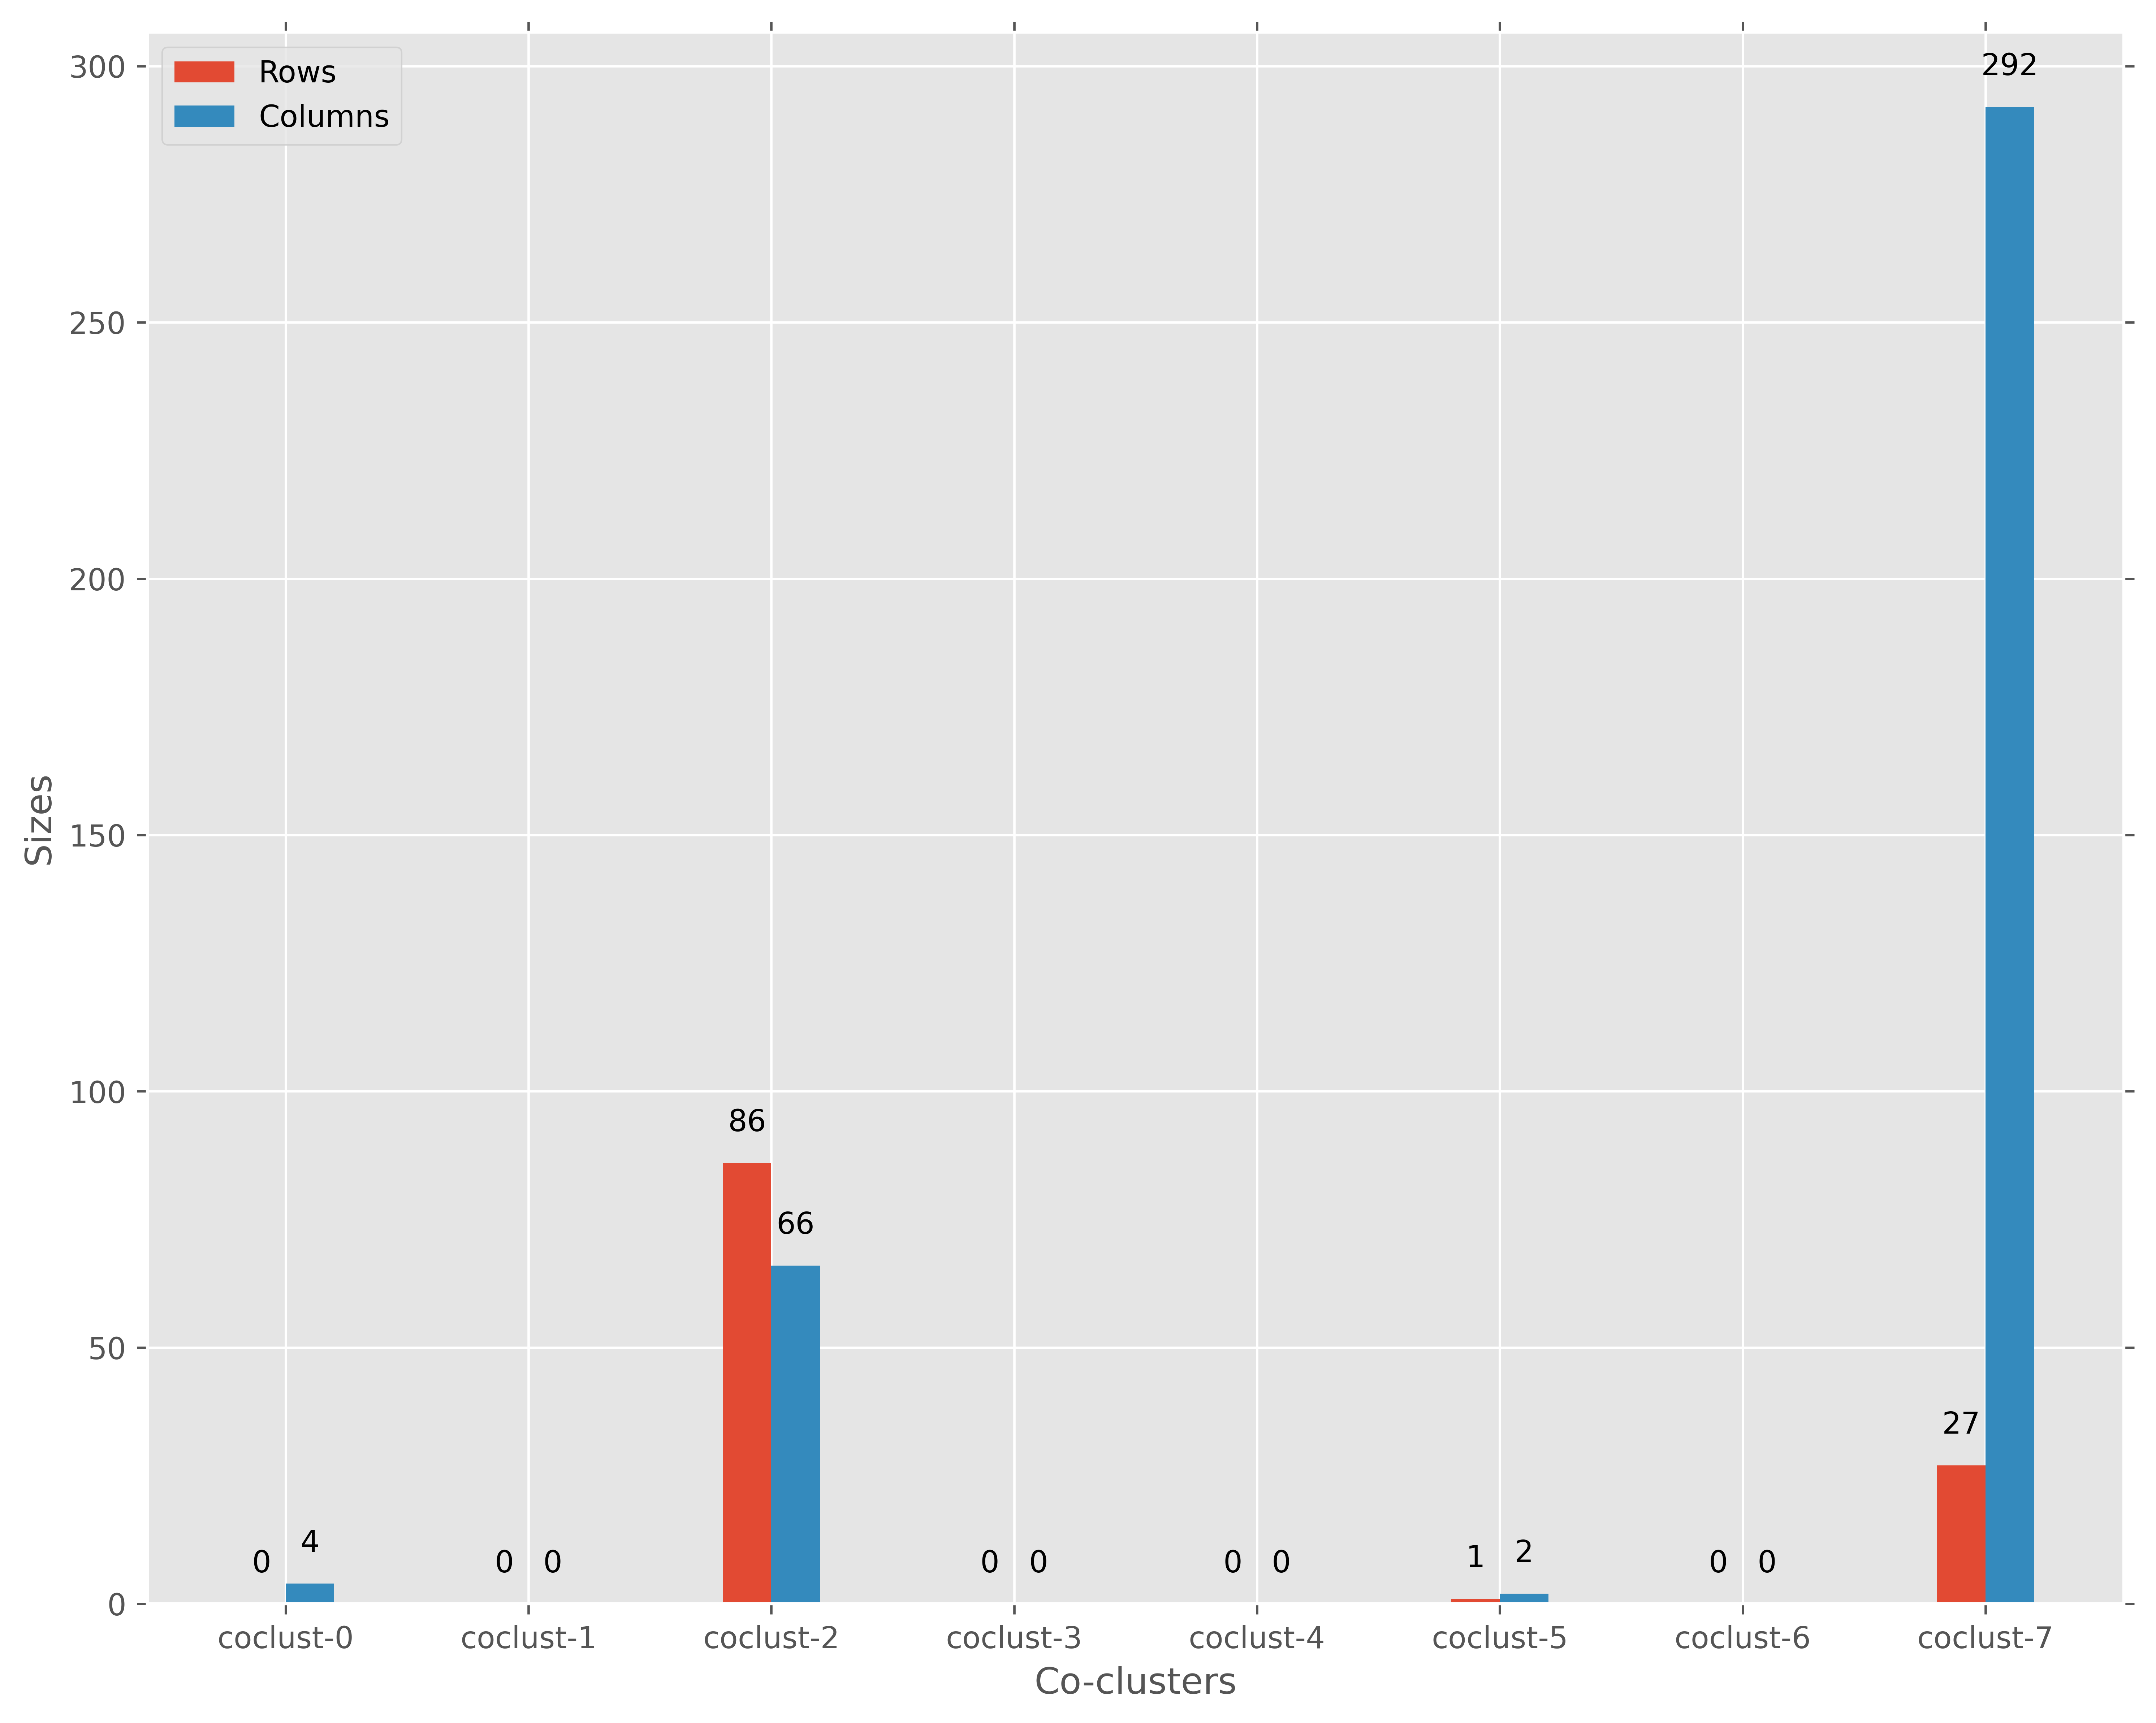

In [135]:
matplotlib.rcParams['figure.figsize'] = [5, 5] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 600 #width, height (both in inches)
plot_cluster_sizes(model)

In [136]:
np.unique(np.array(predicted_row_labels), return_counts=True)

(array([2, 5, 7]), array([86,  1, 27], dtype=int64))

In [141]:
ml_df_copy = ml_df.copy()
ml_df_copy['residues'] = resnums
ml_df_copy['row_cluster_labels'] = predicted_row_labels

In [143]:
ml_df_copy.loc[ml_df_copy['row_cluster_labels'] == 7]

7EW2_intenergysum 7EW3_intenergysum 7EW4_intenergysum 7EW1_intenergysum  \
18                0.0               0.0               0.0               0.0   
21                0.0              -0.1               0.0              -1.8   
22                0.0               0.0               0.0               0.0   
25               -2.3              -0.1               0.0               0.0   
26               -0.2               0.0               0.0               0.0   
28                NaN               NaN               0.0               0.0   
29                NaN               NaN               NaN               NaN   
36          -6.744811          -8.58787               0.0               0.0   
38                0.0               0.0               0.0               0.0   
39               -0.1               0.0              -0.5               0.0   
42                0.0               0.0              -0.3              -0.1   
56                0.0               0.0               0.0               0.0   
58                0.0               0.0               0.0               0.0   
59                0.0               0.0               0.0               0.0   
63                NaN               NaN               0.0               0.0   
66                0.0               0.0               0.0               0.0   
69                0.0               0.0               0.0               0.0   
70                0.0               0.0              -0.2               0.0   
73                0.0               0.0               0.0               0.0   
82                0.0               0.0              -0.1               0.0   
85                0.0               0.0              -0.3              -0.1   
86                0.0               0.0               0.0               0.0   
89                0.0               0.0              -0.4              -0.1   
99                0.0               0.0               0.0               0.0   
102               0.0               0.0               0.0               0.0   
106               0.0               0.0               0.0              -0.2   
109               0.0               0.0               0.0               0.0   

    7LD4_intenergysum 7LD3_intenergysum 7RM5_intenergysum 7M8W_intenergysum  \
18                0.0               0.0               0.0               0.0   
21                0.0               0.0               0.0               0.0   
22                0.0               0.0               0.0               0.0   
25                0.0               0.0               0.0               0.0   
26                0.0               0.0               0.0               0.0   
28                0.0               0.0               0.0               0.0   
29                NaN               NaN               NaN               NaN   
36                0.0               0.0               0.0               0.0   
38                0.0               0.0               0.0              -0.2   
39               -0.1              -0.1               0.0               0.0   
42               -0.2              -0.1               0.0               0.0   
56                0.0               0.0               0.0               0.0   
58                0.0               0.0               0.0               0.0   
59                0.0               0.0               0.0               0.0   
63                0.0               0.0               0.0               0.0   
66                0.0               0.0               0.0               0.0   
69                0.0               0.0               0.0         -1.451371   
70                0.0               0.0               0.0               0.0   
73                0.0               0.0               0.0               0.0   
82                0.0               0.0               0.0               0.0   
85               -1.2              -1.6               0.0              -1.4   
86                0.0               0.0              

In [147]:
ml_df_T = ml_df.transpose()

In [149]:
ml_df_T.columns = resnums

In [151]:
ml_df_T['label'] = predicted_column_labels

In [156]:
ml_df_T.loc[ml_df_T['label'] == 0]

1.27 1.30 1.31 1.34 1.35 1.36 1.38 1.39 1.42 1.43  ... 7.38  \
7NA7_intenergysum  NaN  0.0  0.0  0.0  0.0  0.0  0.0  NaN  0.0  0.0  ...  0.0   
7FIG_intenergysum  NaN  NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
5T04_intenergysum  NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4XEE_intenergysum  NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

                  7.39 7.40 7.41 7.42 7.43 7.45 7.46 7.47 label  
7NA7_intenergysum  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0  
7FIG_intenergysum  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0  
5T04_intenergysum  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0  
4XEE_intenergysum  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0  

[4 rows x 115 columns]

In [137]:
np.unique(np.array(predicted_column_labels), return_counts=True)

(array([0, 2, 5, 7]), array([  4,  66,   2, 292], dtype=int64))

### Plotting Coclust Clustering

In [74]:
ml_df.fillna(999, inplace = True)

In [75]:
ml_df.dtypes

7EW2_intenergysum    float64
7EW3_intenergysum    float64
7EW4_intenergysum    float64
7EW1_intenergysum    float64
7LD4_intenergysum    float64
                      ...   
5C1M_intenergysum    float64
4EJ4_intenergysum    float64
4DKL_intenergysum    float64
6Z10_intenergysum    float64
6RNK_intenergysum    float64
Length: 364, dtype: object

In [76]:
len(ml_df)

114

In [77]:
len(resnums)

114

In [78]:
# determine where to place row lines
uniqs = np.unique(np.array(predicted_row_labels), return_counts=True)
line_count = 0
row_line_markers = []
for i in list(uniqs[1]):
    line_count += i
    row_line_markers.append(line_count)
    print(line_count)
    
print(row_line_markers)

27
114
[27, 114]


In [79]:
# determine where to place column lines
uniqs = np.unique(np.array(predicted_column_labels), return_counts=True)
line_count = 0
col_line_markers = []
for i in list(uniqs[1]):
    line_count += i
    col_line_markers.append(line_count)
    print(line_count)
    
print(col_line_markers)

4
293
364
[4, 293, 364]


In [80]:
PDBids = []

for col in ml_df.columns:
    PDBids.append(col[:4])

<Figure size 15000x15000 with 0 Axes>

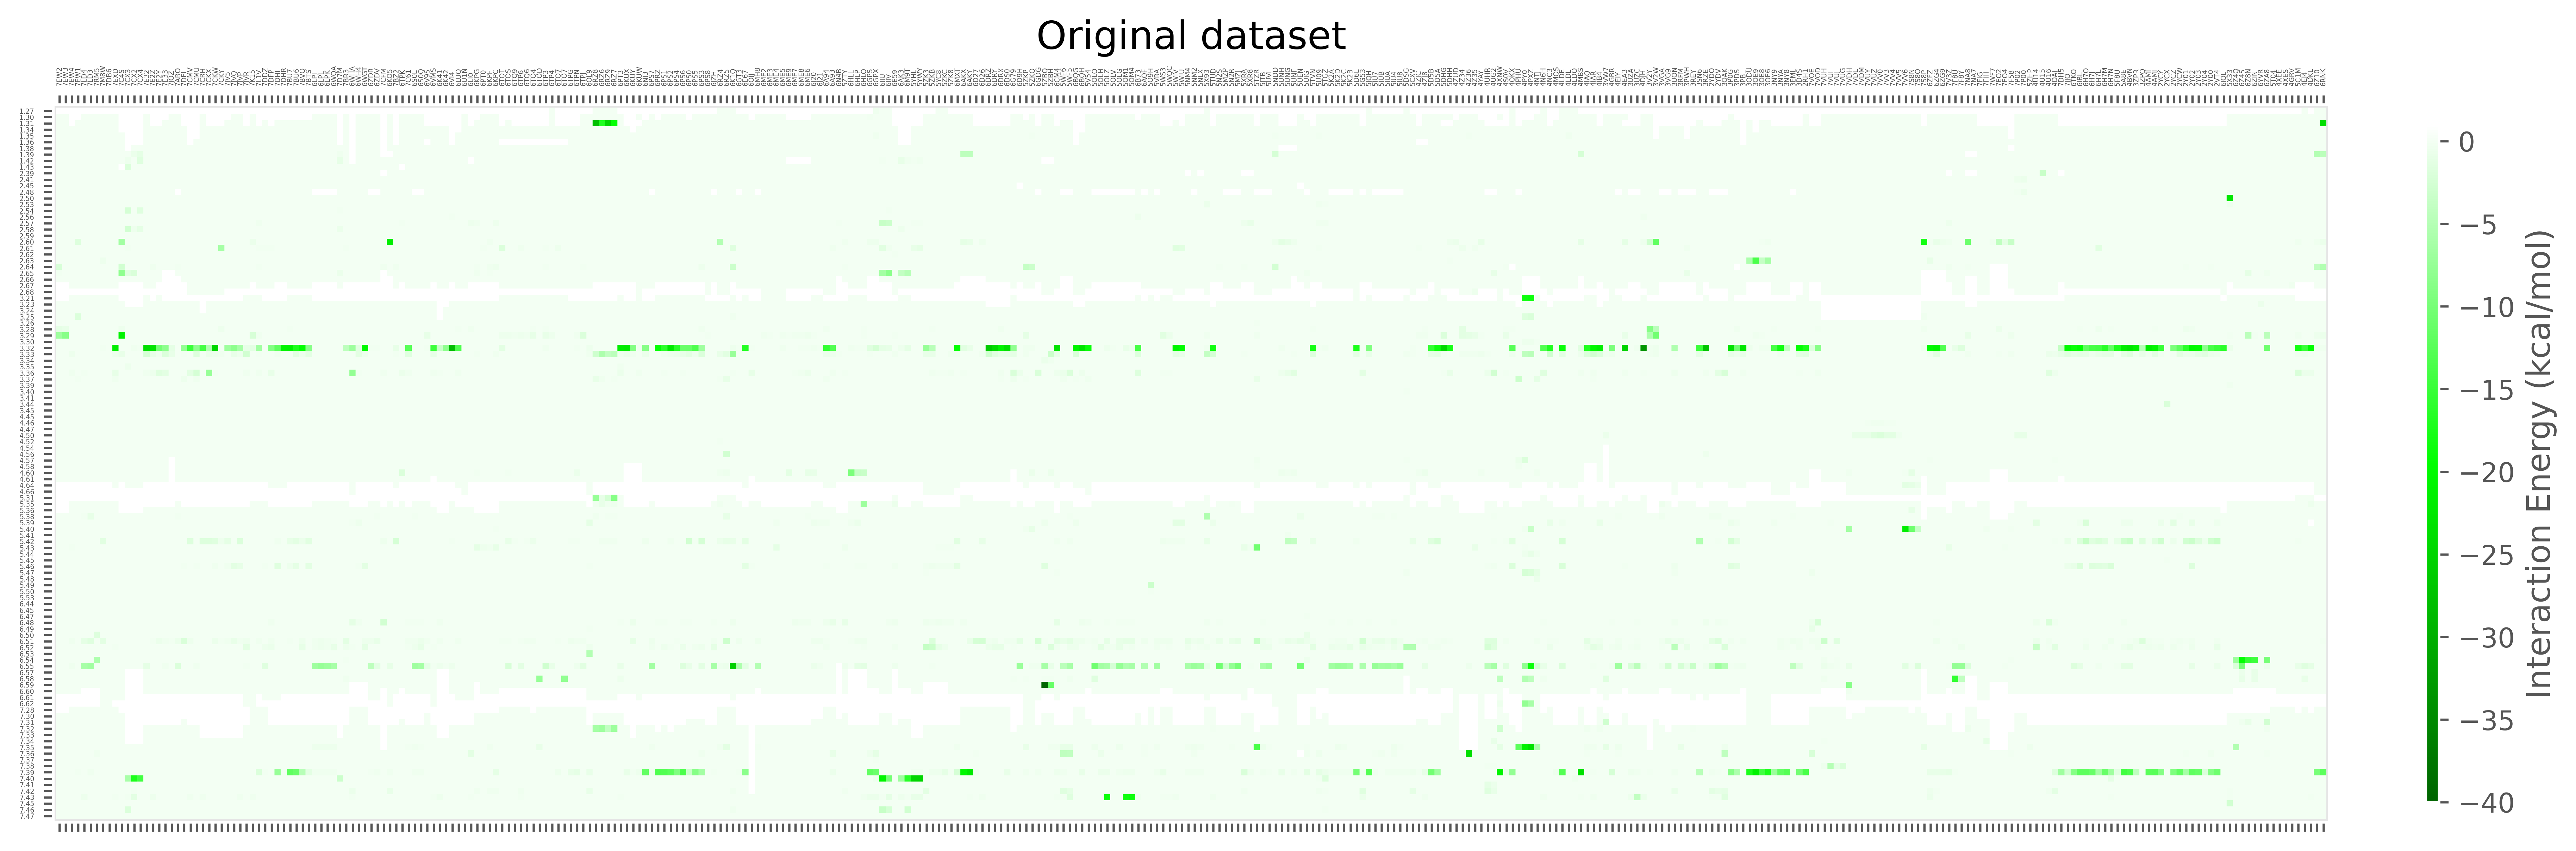

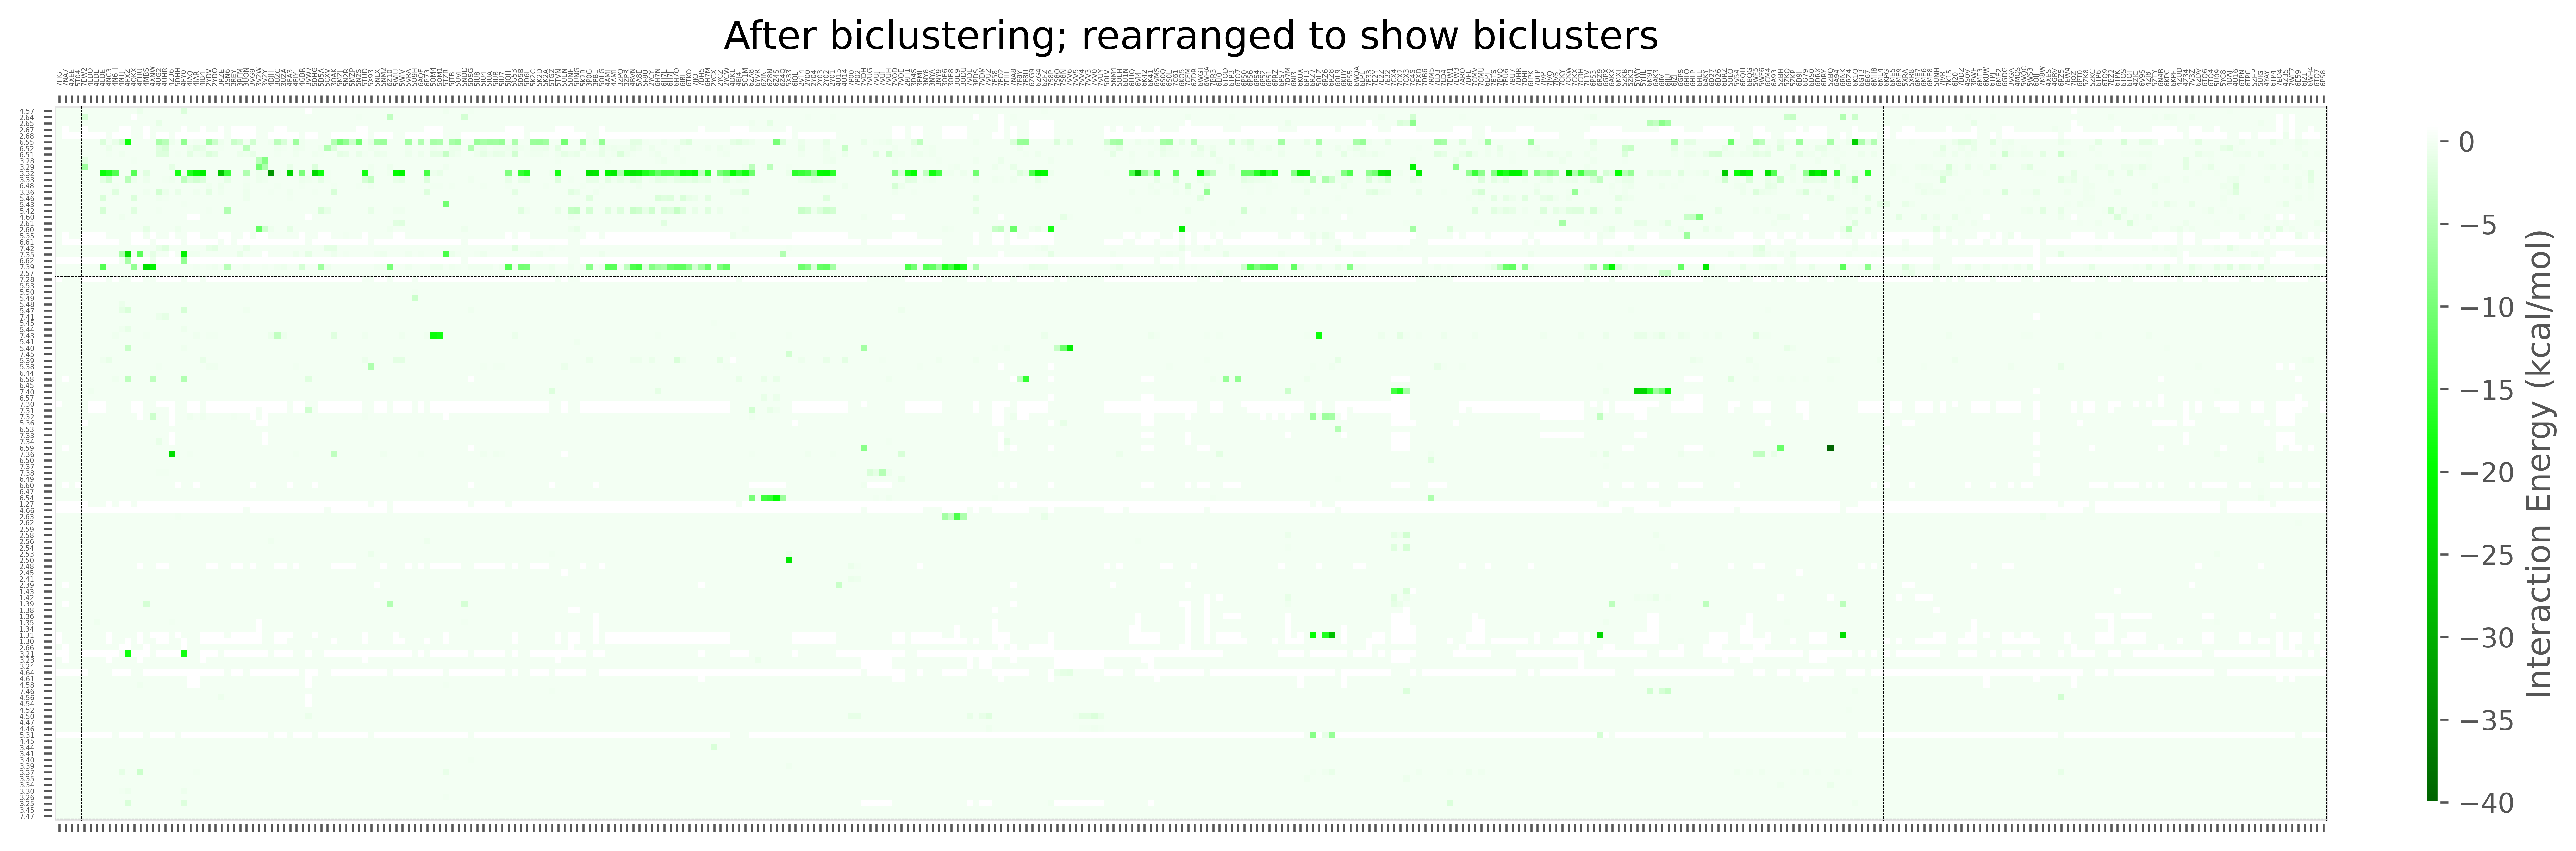

In [81]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


matplotlib.rcParams['figure.figsize'] = [25, 25] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 600 #width, height (both in inches)
fig = plt.figure(figsize=(25, 25), dpi = 600)

# convert some variables to numpy arrays for sorting
ml_df_np = ml_df.to_numpy()
X_np = X.to_numpy()
PDBids_np = np.array(PDBids)
resnums_np = np.array(resnums)

# Original Dataset Plot
#plt.gcf().set_size_inches(75, 75)
#plt.gcf().set_dpi(300)
norm= plt.Normalize(-40,1)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["darkgreen","lime","white"])
plt.matshow(ml_df, cmap=cmap, norm=norm)
ratio = X.shape[0]/X.shape[1]
cbar = plt.colorbar(fraction=0.04*ratio, pad = 0.04, aspect = 50, shrink = 0.9)
cbar.set_label('Interaction Energy (kcal/mol)', rotation=90)
plt.yticks(np.arange(len(y)), resnums, fontsize = 2.5)
plt.xticks(np.arange(len(X.columns)), PDBids, fontsize = 2.5, rotation = 90)

# # Gridlines
# plt.gca().set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor='true')
# plt.gca().set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor='true')
# plt.grid(which='minor', color = 'white', linewidth = 0.1)

# for i in range(len(resnums)):
#     plt.axhline(y= i + 0.5, color='white', linestyle='-', linewidth = 0.1)
    
# for i in range(len(PDBids)):
#     plt.axhline(y= i + 0.5, color='white', linestyle='-', linewidth = 0.1)

plt.ylim([-1,len(resnums)])
plt.xlim([-1,len(PDBids)])
plt.gca().invert_yaxis()
plt.title("Original dataset")
plt.grid(None)
# plt.savefig('plots/allresidues_biclustering_10clusters_original.png')

plt.show()

# Biclustering Arranged Plot

fit_data = ml_df_np[np.argsort(predicted_row_labels)]
fit_data = fit_data[:, np.argsort(predicted_column_labels)]

plt.matshow(fit_data, cmap=cmap, norm=norm)
ratio = X.shape[0]/X.shape[1]
cbar = plt.colorbar(fraction=0.04*ratio, pad = 0.04, aspect = 50, shrink = 0.9)
cbar.set_label('Interaction Energy (kcal/mol)', rotation=90)
plt.yticks(np.arange(len(y)), list(resnums_np[np.argsort(predicted_row_labels)]), fontsize = 2.5)
plt.xticks(np.arange(len(X.columns)), list(PDBids_np[np.argsort(predicted_column_labels)]), fontsize = 2.5, rotation = 90)

# column lines
for i in col_line_markers:
     plt.axvline(x = i - 0.5, color='black', linestyle='dashed', linewidth = 0.25)
        
# row lines
for i in row_line_markers:
     plt.axhline(y = i - 0.5, color='black', linestyle='dashed', linewidth = 0.25)


plt.ylim([-1,len(resnums)])
plt.xlim([-1,len(PDBids)])
plt.gca().invert_yaxis()
plt.title("After biclustering; rearranged to show biclusters")
plt.grid(None) 
# plt.savefig('plots/allresidues_biclustering_10clusters_rearranged.png')

plt.show()

## COCLUST (all. residues)

In [157]:
import pickle

# read in filled ml_df for plotting
ml_df = pd.read_pickle('pickles/ml_df_filled_allresidues_intergysums_nonscaled.pkl')

# keep only intenergysum columns
for col in ml_df.columns:
    if 'intenergysum' not in col:
        ml_df.drop([col], axis = 1, inplace = True)
        
# ml_df.fillna(999, inplace = True)
        
display(ml_df)

7EW2_intenergysum 7EW3_intenergysum 7EW4_intenergysum 7EW1_intenergysum  \
0                 NaN               NaN               NaN               NaN   
1                 NaN               NaN               NaN               NaN   
2                 NaN               NaN               NaN               NaN   
3                 NaN               NaN               NaN               NaN   
4                 NaN               NaN               NaN               NaN   
..                ...               ...               ...               ...   
327               NaN               NaN               0.0               NaN   
328               NaN               NaN               0.0               NaN   
329               NaN               NaN               0.0               NaN   
330               NaN               NaN               NaN               NaN   
331               NaN               NaN               NaN               NaN   

    7LD4_intenergysum 7LD3_intenergysum 7RM5_intenergysum 7M8W_intenergysum  \
0                 NaN               NaN               NaN               NaN   
1                 NaN               NaN               NaN               NaN   
2                 NaN               NaN               NaN               NaN   
3                 NaN               NaN               NaN               NaN   
4                 NaN               NaN               NaN               NaN   
..                ...               ...               ...               ...   
327               0.0               0.0               0.0               NaN   
328               0.0               0.0               0.0               NaN   
329               NaN               NaN               NaN               NaN   
330               NaN               NaN               NaN               NaN   
331               NaN               NaN               NaN               NaN   

    7DB6_intenergysum 7EXD_intenergysum  ... 6ZA8_intenergysum  \
0                 NaN               NaN  ...               NaN   
1                 NaN               NaN  ...               NaN   
2                 NaN               NaN  ...               NaN   
3                 NaN               NaN  ...               NaN   
4                 NaN               NaN  ...               NaN   
..                ...               ...  ...               ...   
327               NaN               NaN  ...               NaN   
328               NaN               NaN  ...               NaN   
329               NaN               NaN  ...               NaN   
330               NaN               NaN  ...               NaN   
331               NaN               NaN  ...               NaN   

    5T04_intenergysum 4XEE_intenergysum 4XES_intenergysum 4GRV_intenergysum  \
0                 NaN               NaN               NaN               NaN   
1                 NaN               NaN               NaN               NaN   
2                 NaN               NaN               NaN               NaN   
3                 NaN               NaN               NaN               NaN   
4                 NaN               NaN               NaN               NaN   
..                ...               ...               ...               ...   
327               NaN               NaN               NaN               NaN   
328               NaN               NaN               NaN               NaN   
329               NaN               NaN               NaN               NaN   
330               NaN               NaN               NaN               NaN   
331               NaN               NaN               NaN               NaN   

    5C1M_intenergysum 4EJ4_intenergysum 4DKL_intenergysum 6Z10_intenergysum  \
0                 NaN               NaN               NaN               0.0   
1                 NaN               NaN               NaN               0.0   
2                 NaN               NaN               NaN               0.0   
3                 NaN               NaN         

In [158]:
resnums = list(pd.read_pickle('pickles/y_residues.pkl'))
y = list(pd.read_pickle('pickles/y_residues.pkl'))

In [159]:
ml_df['7EW2_intenergysum'].value_counts()

 0.000000    222
-2.300000      1
-0.200000      1
-1.133249      1
-6.744811      1
-0.100000      1
Name: 7EW2_intenergysum, dtype: int64

In [160]:
len(resnums)

332

In [161]:
from sklearn.impute import SimpleImputer

# data imputation
X = ml_df.copy()
my_imputer = SimpleImputer()
X = pd.DataFrame(my_imputer.fit_transform(X))

#data scaling from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
to_scale = [col for col in X.columns.values]
scaler.fit(X[to_scale])
X[to_scale] = scaler.transform(X[to_scale])

# predict z-scores on the test set
X[to_scale] = scaler.transform(X[to_scale]) 

In [162]:
display(X)

0         1         2         3         4         5         6    \
0    1.147247  1.115869  2.967932  1.520875  1.162975  1.150558  1.177499   
1    1.147247  1.115869  2.967932  1.520875  1.162975  1.150558  1.177499   
2    1.147247  1.115869  2.967932  1.520875  1.162975  1.150558  1.177499   
3    1.147247  1.115869  2.967932  1.520875  1.162975  1.150558  1.177499   
4    1.147247  1.115869  2.967932  1.520875  1.162975  1.150558  1.177499   
..        ...       ...       ...       ...       ...       ...       ...   
327  1.147247  1.115869  3.000000  1.520875  1.163934  1.151515  1.178571   
328  1.147247  1.115869  3.000000  1.520875  1.163934  1.151515  1.178571   
329  1.147247  1.115869  3.000000  1.520875  1.162975  1.150558  1.177499   
330  1.147247  1.115869  2.967932  1.520875  1.162975  1.150558  1.177499   
331  1.147247  1.115869  2.967932  1.520875  1.162975  1.150558  1.177499   

          7          8         9    ...       354  355  356       357  \
0    1.681193  10.914894  1.046038  ...  1.091254  0.0  0.0  10.95614   
1    1.681193  10.914894  1.046038  ...  1.091254  0.0  0.0  10.95614   
2    1.681193  10.914894  1.046038  ...  1.091254  0.0  0.0  10.95614   
3    1.681193  10.914894  1.046038  ...  1.091254  0.0  0.0  10.95614   
4    1.681193  10.914894  1.046038  ...  1.091254  0.0  0.0  10.95614   
..        ...        ...       ...  ...       ...  ...  ...       ...   
327  1.681193  10.914894  1.046038  ...  1.091254  0.0  0.0  10.95614   
328  1.681193  10.914894  1.046038  ...  1.091254  0.0  0.0  10.95614   
329  1.681193  10.914894  1.046038  ...  1.091254  0.0  0.0  10.95614   
330  1.681193  10.914894  1.046038  ...  1.091254  0.0  0.0  10.95614   
331  1.681193  10.914894  1.046038  ...  1.091254  0.0  0.0  10.95614   

          358       359       360       361       362       363  
0    4.318584  1.054784  1.066840  0.997411  1.100308  1.042002  
1    4.318584  1.054784  1.066840  0.997411  1.100308  1.042002  
2    4.318584  1.054784  1.066840  0.997411  1.100308  1.042002  
3    4.318584  1.054784  1.066840  0.997411  1.100308  1.042002  
4    4.318584  1.054784  1.067231  0.997411  1.100308  1.042002  
..        ...       ...       ...       ...       ...       ...  
327  4.318584  1.054784  1.066840  0.997411  1.099396  1.041629  
328  4.318584  1.054784  1.066840  0.997411  1.099396  1.041629  
329  4.318584  1.054784  1.066840  0.997411  1.099396  1.041629  
330  4.318584  1.054784  1.066840  0.997411  1.099396  1.041629  
331  4.318584  1.054784  1.066840  0.997411  1.099396  1.041629  

[332 rows x 364 columns]

In [163]:
import coclust
from coclust.visualization import (plot_reorganized_matrix, plot_cluster_top_terms, plot_max_modularities)
from coclust.evaluation.internal import best_modularity_partition
from coclust.coclustering import CoclustMod, CoclustSpecMod

In [164]:
X.values.shape

(332, 364)

In [165]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [25, 10] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 600 #width, height (both in inches)

# get the best co-clustering over a range of cluster numbers
clusters_range = range(2, 51)
model, modularities = best_modularity_partition(X.values, clusters_range, n_rand_init=1)

plot_max_modularities(modularities, range(2, 52))

Computing coclust modularity for a range of cluster numbers =
 2 ...
 3 ...
 4 ...
 5 ...
 6 ...
 7 ...
 8 ...
 9 ...
 10 ...
 11 ...
 12 ...
 13 ...
 14 ...
 15 ...
 16 ...
 17 ...
 18 ...
 19 ...
 20 ...
 21 ...
 22 ...
 23 ...
 24 ...
 25 ...
 26 ...
 27 ...
 28 ...
 29 ...
 30 ...
 31 ...
 32 ...
 33 ...
 34 ...
 35 ...
 36 ...
 37 ...
 38 ...
 39 ...
 40 ...
 41 ...
 42 ...
 43 ...
 44 ...
 45 ...
 46 ...
 47 ...
 48 ...
 49 ...
 50 ...
 All done !


In [166]:
i = 2
for mod in modularities:
    if mod == max(modularities):
        print(i)
    i += 1

6
33
46


In [167]:
model = CoclustMod(n_clusters=6, random_state = 999)
model.fit(X.values)

print(model.modularity)
predicted_row_labels = model.row_labels_
predicted_column_labels = model.column_labels_

0.0016493557176968001


In [168]:
np.unique(np.array(predicted_row_labels), return_counts=True)

(array([0, 2]), array([ 65, 267], dtype=int64))

In [169]:
np.unique(np.array(predicted_column_labels), return_counts=True)

(array([0, 2]), array([297,  67], dtype=int64))

### Plotting Coclust Clustering

In [170]:
ml_df.fillna(999, inplace = True)

In [171]:
ml_df.dtypes

7EW2_intenergysum    float64
7EW3_intenergysum    float64
7EW4_intenergysum    float64
7EW1_intenergysum    float64
7LD4_intenergysum    float64
                      ...   
5C1M_intenergysum    float64
4EJ4_intenergysum    float64
4DKL_intenergysum    float64
6Z10_intenergysum    float64
6RNK_intenergysum    float64
Length: 364, dtype: object

In [172]:
len(ml_df)

332

In [173]:
len(resnums)

332

In [174]:
# determine where to place row lines
uniqs = np.unique(np.array(predicted_row_labels), return_counts=True)
line_count = 0
row_line_markers = []
for i in list(uniqs[1]):
    line_count += i
    row_line_markers.append(line_count)
    print(line_count)
    
print(row_line_markers)

65
332
[65, 332]


In [175]:
# determine where to place column lines
uniqs = np.unique(np.array(predicted_column_labels), return_counts=True)
line_count = 0
col_line_markers = []
for i in list(uniqs[1]):
    line_count += i
    col_line_markers.append(line_count)
    print(line_count)
    
print(col_line_markers)

297
364
[297, 364]


In [176]:
PDBids = []

for col in ml_df.columns:
    PDBids.append(col[:4])

In [177]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


matplotlib.rcParams['figure.figsize'] = [25, 25] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 600 #width, height (both in inches)
fig = plt.figure(figsize=(25, 25), dpi = 600)

# convert some variables to numpy arrays for sorting
ml_df_np = ml_df.to_numpy()
X_np = X.to_numpy()
PDBids_np = np.array(PDBids)
resnums_np = np.array(resnums)

# Original Dataset Plot
#plt.gcf().set_size_inches(75, 75)
#plt.gcf().set_dpi(300)
norm= plt.Normalize(-40,1)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["darkgreen","lime","white"])
plt.matshow(ml_df, cmap=cmap, norm=norm)
ratio = X.shape[0]/X.shape[1]
cbar = plt.colorbar(fraction=0.04*ratio, pad = 0.04, aspect = 50, shrink = 0.9)
cbar.set_label('Interaction Energy (kcal/mol)', rotation=90)
plt.yticks(np.arange(len(y)), resnums, fontsize = 2.5)
plt.xticks(np.arange(len(X.columns)), PDBids, fontsize = 2.5, rotation = 90)

# # Gridlines
# plt.gca().set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor='true')
# plt.gca().set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor='true')
# plt.grid(which='minor', color = 'white', linewidth = 0.1)

# for i in range(len(resnums)):
#     plt.axhline(y= i + 0.5, color='white', linestyle='-', linewidth = 0.1)
    
# for i in range(len(PDBids)):
#     plt.axhline(y= i + 0.5, color='white', linestyle='-', linewidth = 0.1)

plt.ylim([-1,len(resnums)])
plt.xlim([-1,len(PDBids)])
plt.gca().invert_yaxis()
plt.title("Original dataset")
plt.grid(None)
# plt.savefig('plots/allresidues_biclustering_10clusters_original.png')

plt.show()

# Biclustering Arranged Plot

fit_data = ml_df_np[np.argsort(predicted_row_labels)]
fit_data = fit_data[:, np.argsort(predicted_column_labels)]

plt.matshow(fit_data, cmap=cmap, norm=norm)
ratio = X.shape[0]/X.shape[1]
cbar = plt.colorbar(fraction=0.04*ratio, pad = 0.04, aspect = 50, shrink = 0.9)
cbar.set_label('Interaction Energy (kcal/mol)', rotation=90)
plt.yticks(np.arange(len(y)), list(resnums_np[np.argsort(predicted_row_labels)]), fontsize = 2.5)
plt.xticks(np.arange(len(X.columns)), list(PDBids_np[np.argsort(predicted_column_labels)]), fontsize = 2.5, rotation = 90)

# column lines
for i in col_line_markers:
     plt.axvline(x = i - 0.5, color='black', linestyle='dashed', linewidth = 0.25)
        
# row lines
for i in row_line_markers:
     plt.axhline(y = i - 0.5, color='black', linestyle='dashed', linewidth = 0.25)


plt.ylim([-1,len(resnums)])
plt.xlim([-1,len(PDBids)])
plt.gca().invert_yaxis()
plt.title("After biclustering; rearranged to show biclusters")
plt.grid(None) 
# plt.savefig('plots/allresidues_biclustering_10clusters_rearranged.png')

plt.show()

<Figure size 15000x15000 with 0 Axes>

## COCLUST (filtered residues)

In [4]:
import pickle

# read in filled ml_df for plotting
ml_df = pd.read_pickle('pickles/ml_df_filled_refresh_clipped.pkl')

# keep only intenergysum columns
for col in ml_df.columns:
    if 'intenergysum' not in col:
        ml_df.drop([col], axis = 1, inplace = True)
        
#ml_df.fillna(999, inplace = True)
        
display(ml_df)

7EW2_intenergysum 7EW3_intenergysum 7EW4_intenergysum 7EW1_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
194                 0                 0                 0                 0   
195                 0                 0                 0                 0   
196                 0                 0                 0                 0   
197               0.0               0.0               0.0               0.0   
198               0.0               0.0               0.0               0.0   

    7LD4_intenergysum 7LD3_intenergysum 7RM5_intenergysum 7M8W_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
194                 0                 0                 0                 0   
195                 0                 0                 0                 0   
196                 0                 0                 0                 0   
197               0.0               0.0               0.0               0.0   
198               0.0               0.0               0.0               0.0   

    7DB6_intenergysum 7EXD_intenergysum  ... 6ZA8_intenergysum  \
0                 0.0               0.0  ...               0.0   
1                 0.0               0.0  ...               0.0   
2                 0.0               0.0  ...               0.0   
3                 0.0               0.0  ...               0.0   
4                 0.0               0.0  ...               0.0   
..                ...               ...  ...               ...   
194                 0                 0  ...                 0   
195                 0                 0  ...                 0   
196                 0                 0  ...                 0   
197               0.0               0.0  ...               0.0   
198               0.0               0.0  ...               0.0   

    5T04_intenergysum 4XEE_intenergysum 4XES_intenergysum 4GRV_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
194                 0                 0                 0                 0   
195                 0                 0                 0                 0   
196                 0                 0                 0                 0   
197               0.0               0.0               0.0               0.0   
198               0.0               0.0               0.0               0.0   

    5C1M_intenergysum 4EJ4_intenergysum 4DKL_intenergysum 6Z10_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               NaN               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0         

In [5]:
resnums = list(pd.read_pickle('pickles/y_residues_refresh_clipped.pkl'))
y = list(pd.read_pickle('pickles/y_residues_refresh_clipped.pkl'))

In [6]:
ml_df['7EW2_intenergysum'].value_counts()

 0.000000    193
-2.300000      1
-0.200000      1
-1.133249      1
-6.744811      1
-0.100000      1
Name: 7EW2_intenergysum, dtype: int64

In [7]:
len(resnums)

199

In [8]:
from sklearn.impute import SimpleImputer

# data imputation
X = ml_df.copy()
my_imputer = SimpleImputer()
X = pd.DataFrame(my_imputer.fit_transform(X))

#data scaling from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
to_scale = [col for col in X.columns.values]
scaler.fit(X[to_scale])
X[to_scale] = scaler.transform(X[to_scale])

# predict z-scores on the test set
X[to_scale] = scaler.transform(X[to_scale]) 

In [9]:
display(X)

0         1    2         3         4         5         6    \
0    1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
1    1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
2    1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
3    1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
4    1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
..        ...       ...  ...       ...       ...       ...       ...   
194  1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
195  1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
196  1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
197  1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
198  1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   

          7     8         9    ...       354  355  356  357  358       359  \
0    1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
1    1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
2    1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
3    1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
4    1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
..        ...   ...       ...  ...       ...  ...  ...  ...  ...       ...   
194  1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
195  1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
196  1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
197  1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
198  1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   

          360      361       362       363  
0    1.067231  0.99765  1.100308  1.082038  
1    1.066794  0.99765  1.100308  1.082038  
2    1.067231  0.99765  1.100308  1.082038  
3    1.067231  0.99765  1.100308  1.082038  
4    1.067231  0.99765  1.100308  1.082038  
..        ...      ...       ...       ...  
194  1.067231  0.99765  1.100308  1.082038  
195  1.067231  0.99765  1.100308  1.082038  
196  1.067231  0.99765  1.100308  1.082038  
197  1.067231  0.99765  1.100308  1.082038  
198  1.067231  0.99765  1.100308  1.082038  

[199 rows x 364 columns]

In [10]:
import coclust
from coclust.visualization import (plot_reorganized_matrix, plot_cluster_top_terms, plot_max_modularities)
from coclust.evaluation.internal import best_modularity_partition
from coclust.coclustering import CoclustMod, CoclustSpecMod
from coclust.visualization import plot_cluster_sizes

In [11]:
X.values.shape

(199, 364)

Computing coclust modularity for a range of cluster numbers =
 2 ...
 3 ...
 4 ...
 5 ...
 6 ...
 7 ...
 8 ...
 9 ...
 10 ...
 11 ...
 12 ...
 13 ...
 14 ...
 15 ...
 16 ...
 17 ...
 18 ...
 19 ...
 20 ...
 21 ...
 22 ...
 23 ...
 24 ...
 25 ...
 26 ...
 27 ...
 28 ...
 29 ...
 30 ...
 31 ...
 32 ...
 33 ...
 34 ...
 35 ...
 36 ...
 37 ...
 38 ...
 39 ...
 40 ...
 41 ...
 42 ...
 43 ...
 44 ...
 45 ...
 46 ...
 47 ...
 48 ...
 49 ...
 50 ...
 All done !


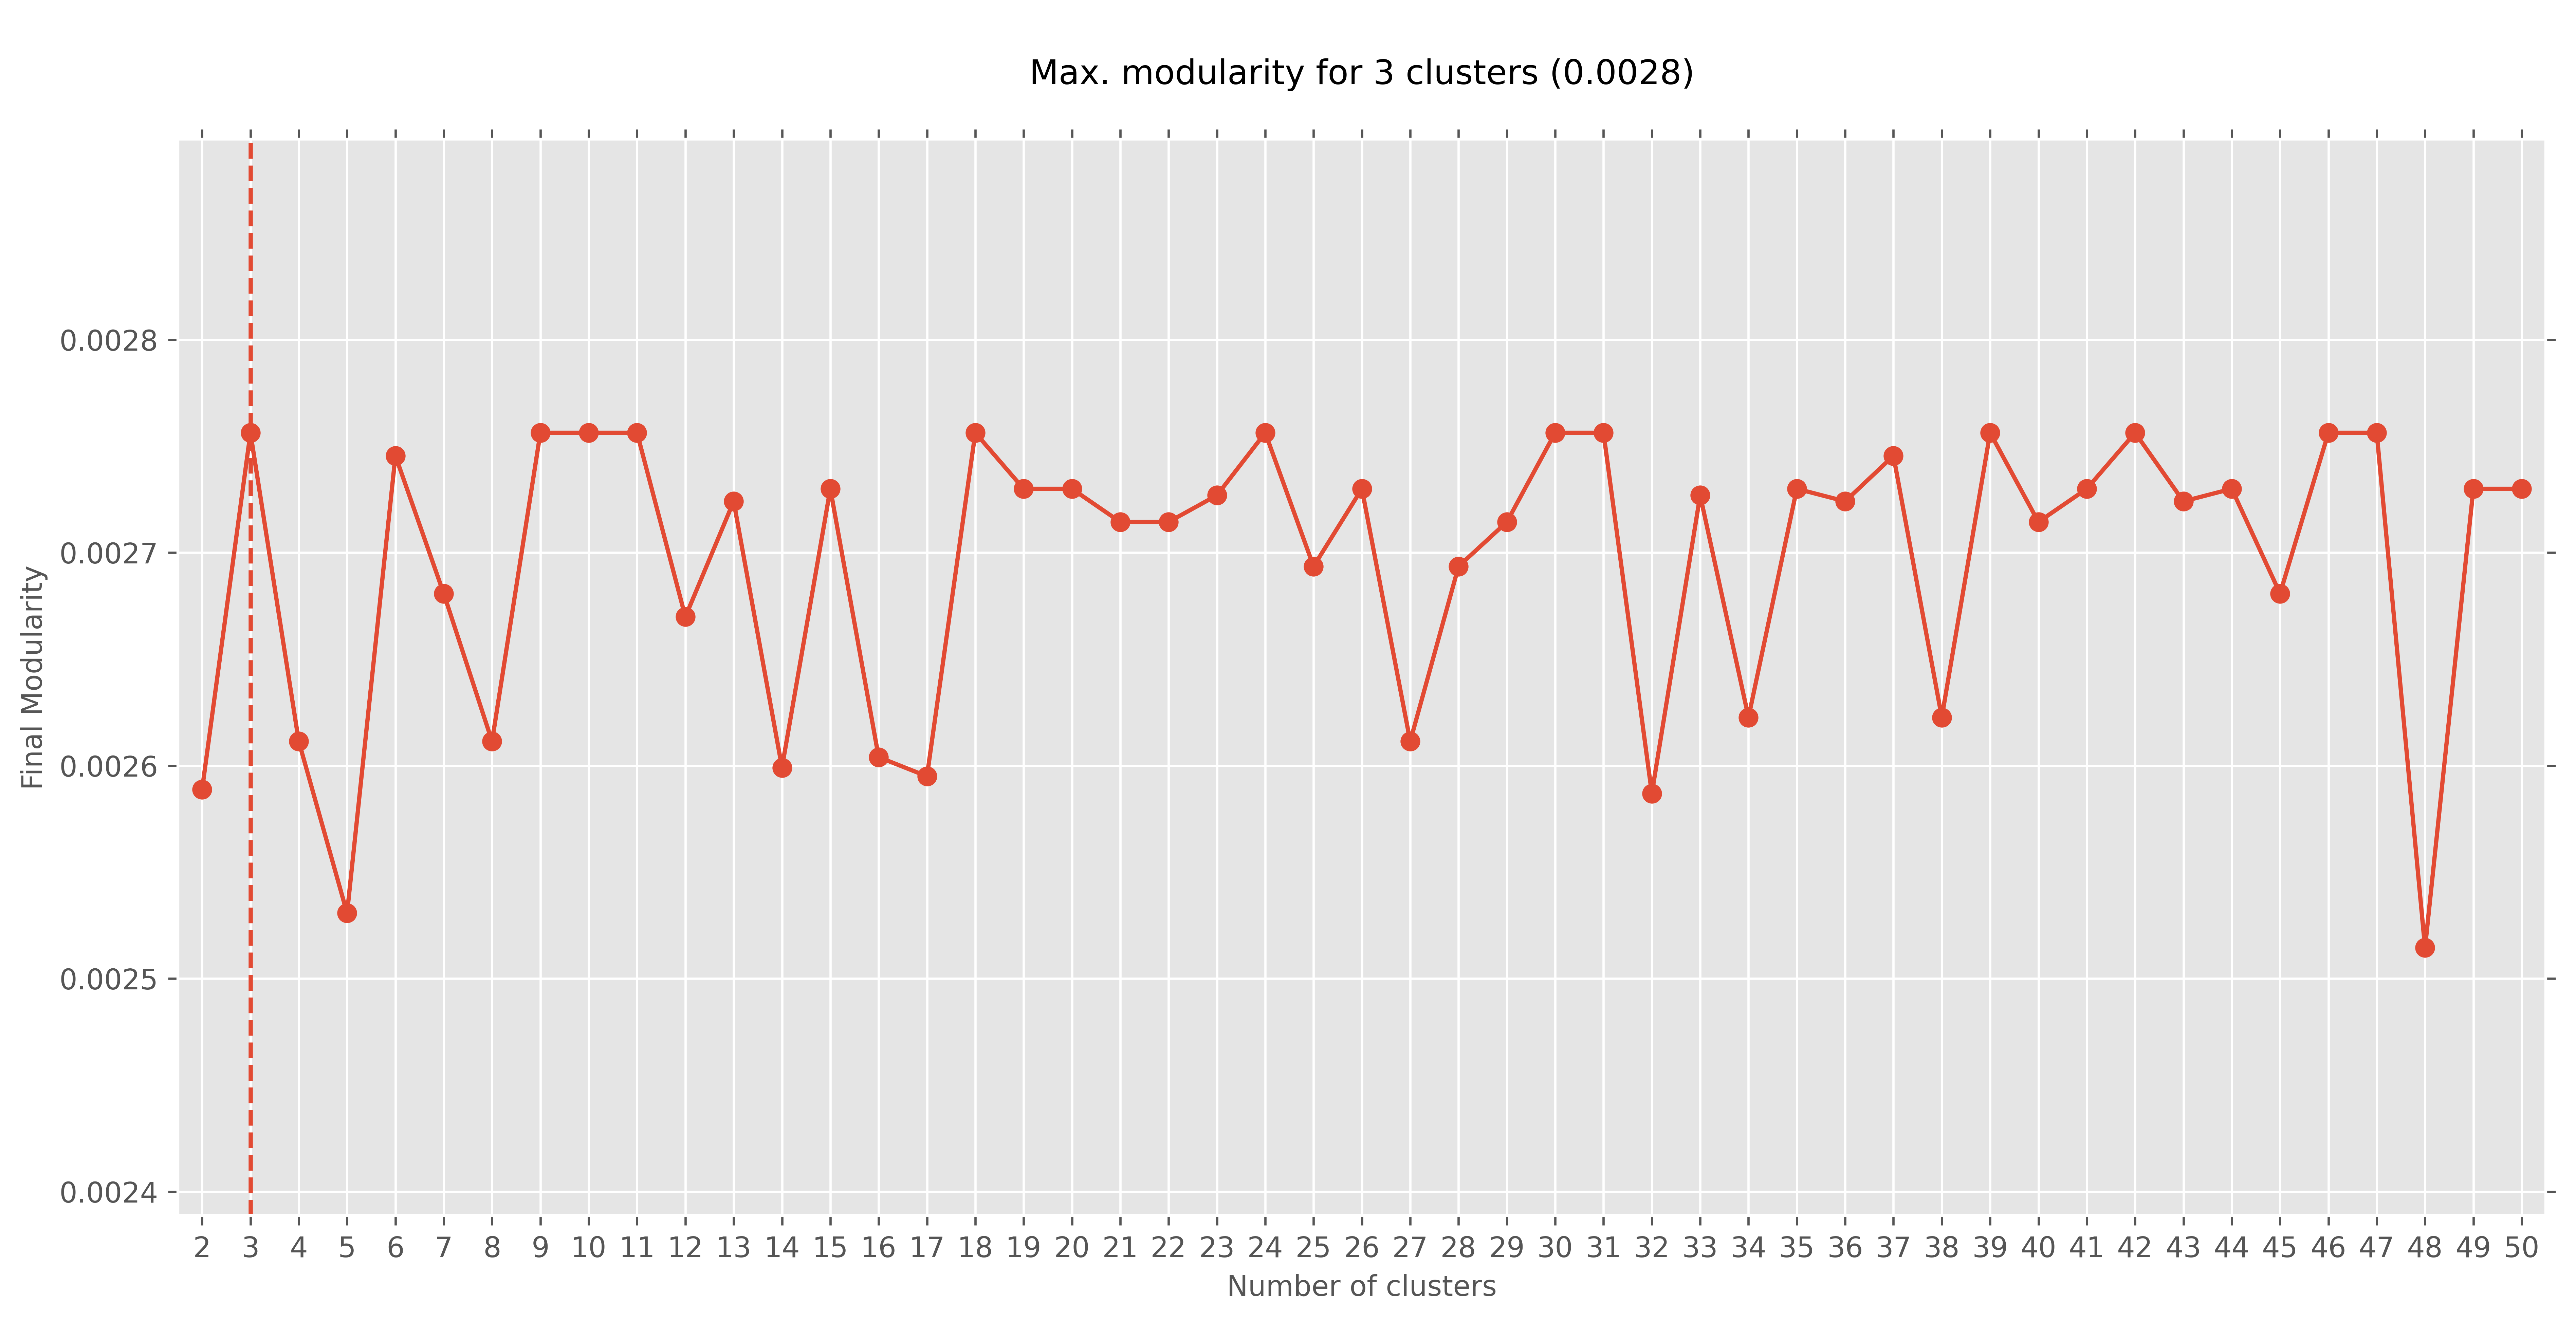

In [12]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 7] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 600 #width, height (both in inches)

# get the best co-clustering over a range of cluster numbers
clusters_range = range(2, 51)
model, modularities = best_modularity_partition(X.values, clusters_range, n_rand_init=1)

plot_max_modularities(modularities, range(2, 52))

In [13]:
i = 2
for mod in modularities:
    if mod == max(modularities):
        print(i)
    i += 1

3
9
10
18
24
30
31
39
42
46
47


In [14]:
X

0         1    2         3         4         5         6    \
0    1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
1    1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
2    1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
3    1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
4    1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
..        ...       ...  ...       ...       ...       ...       ...   
194  1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
195  1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
196  1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
197  1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   
198  1.148262  1.116443  3.0  1.526316  1.163934  1.151515  1.178571   

          7     8         9    ...       354  355  356  357  358       359  \
0    1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
1    1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
2    1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
3    1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
4    1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
..        ...   ...       ...  ...       ...  ...  ...  ...  ...       ...   
194  1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
195  1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
196  1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
197  1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   
198  1.689004  11.0  1.046261  ...  1.092383  0.0  0.0  0.0  0.0  1.055098   

          360      361       362       363  
0    1.067231  0.99765  1.100308  1.082038  
1    1.066794  0.99765  1.100308  1.082038  
2    1.067231  0.99765  1.100308  1.082038  
3    1.067231  0.99765  1.100308  1.082038  
4    1.067231  0.99765  1.100308  1.082038  
..        ...      ...       ...       ...  
194  1.067231  0.99765  1.100308  1.082038  
195  1.067231  0.99765  1.100308  1.082038  
196  1.067231  0.99765  1.100308  1.082038  
197  1.067231  0.99765  1.100308  1.082038  
198  1.067231  0.99765  1.100308  1.082038  

[199 rows x 364 columns]

In [15]:
model = CoclustMod(n_clusters=10, random_state=999)
model.fit(X.values)

print(model)
predicted_row_labels = model.row_labels_
predicted_column_labels = model.column_labels_

CoclustMod(n_clusters=10, random_state=999)


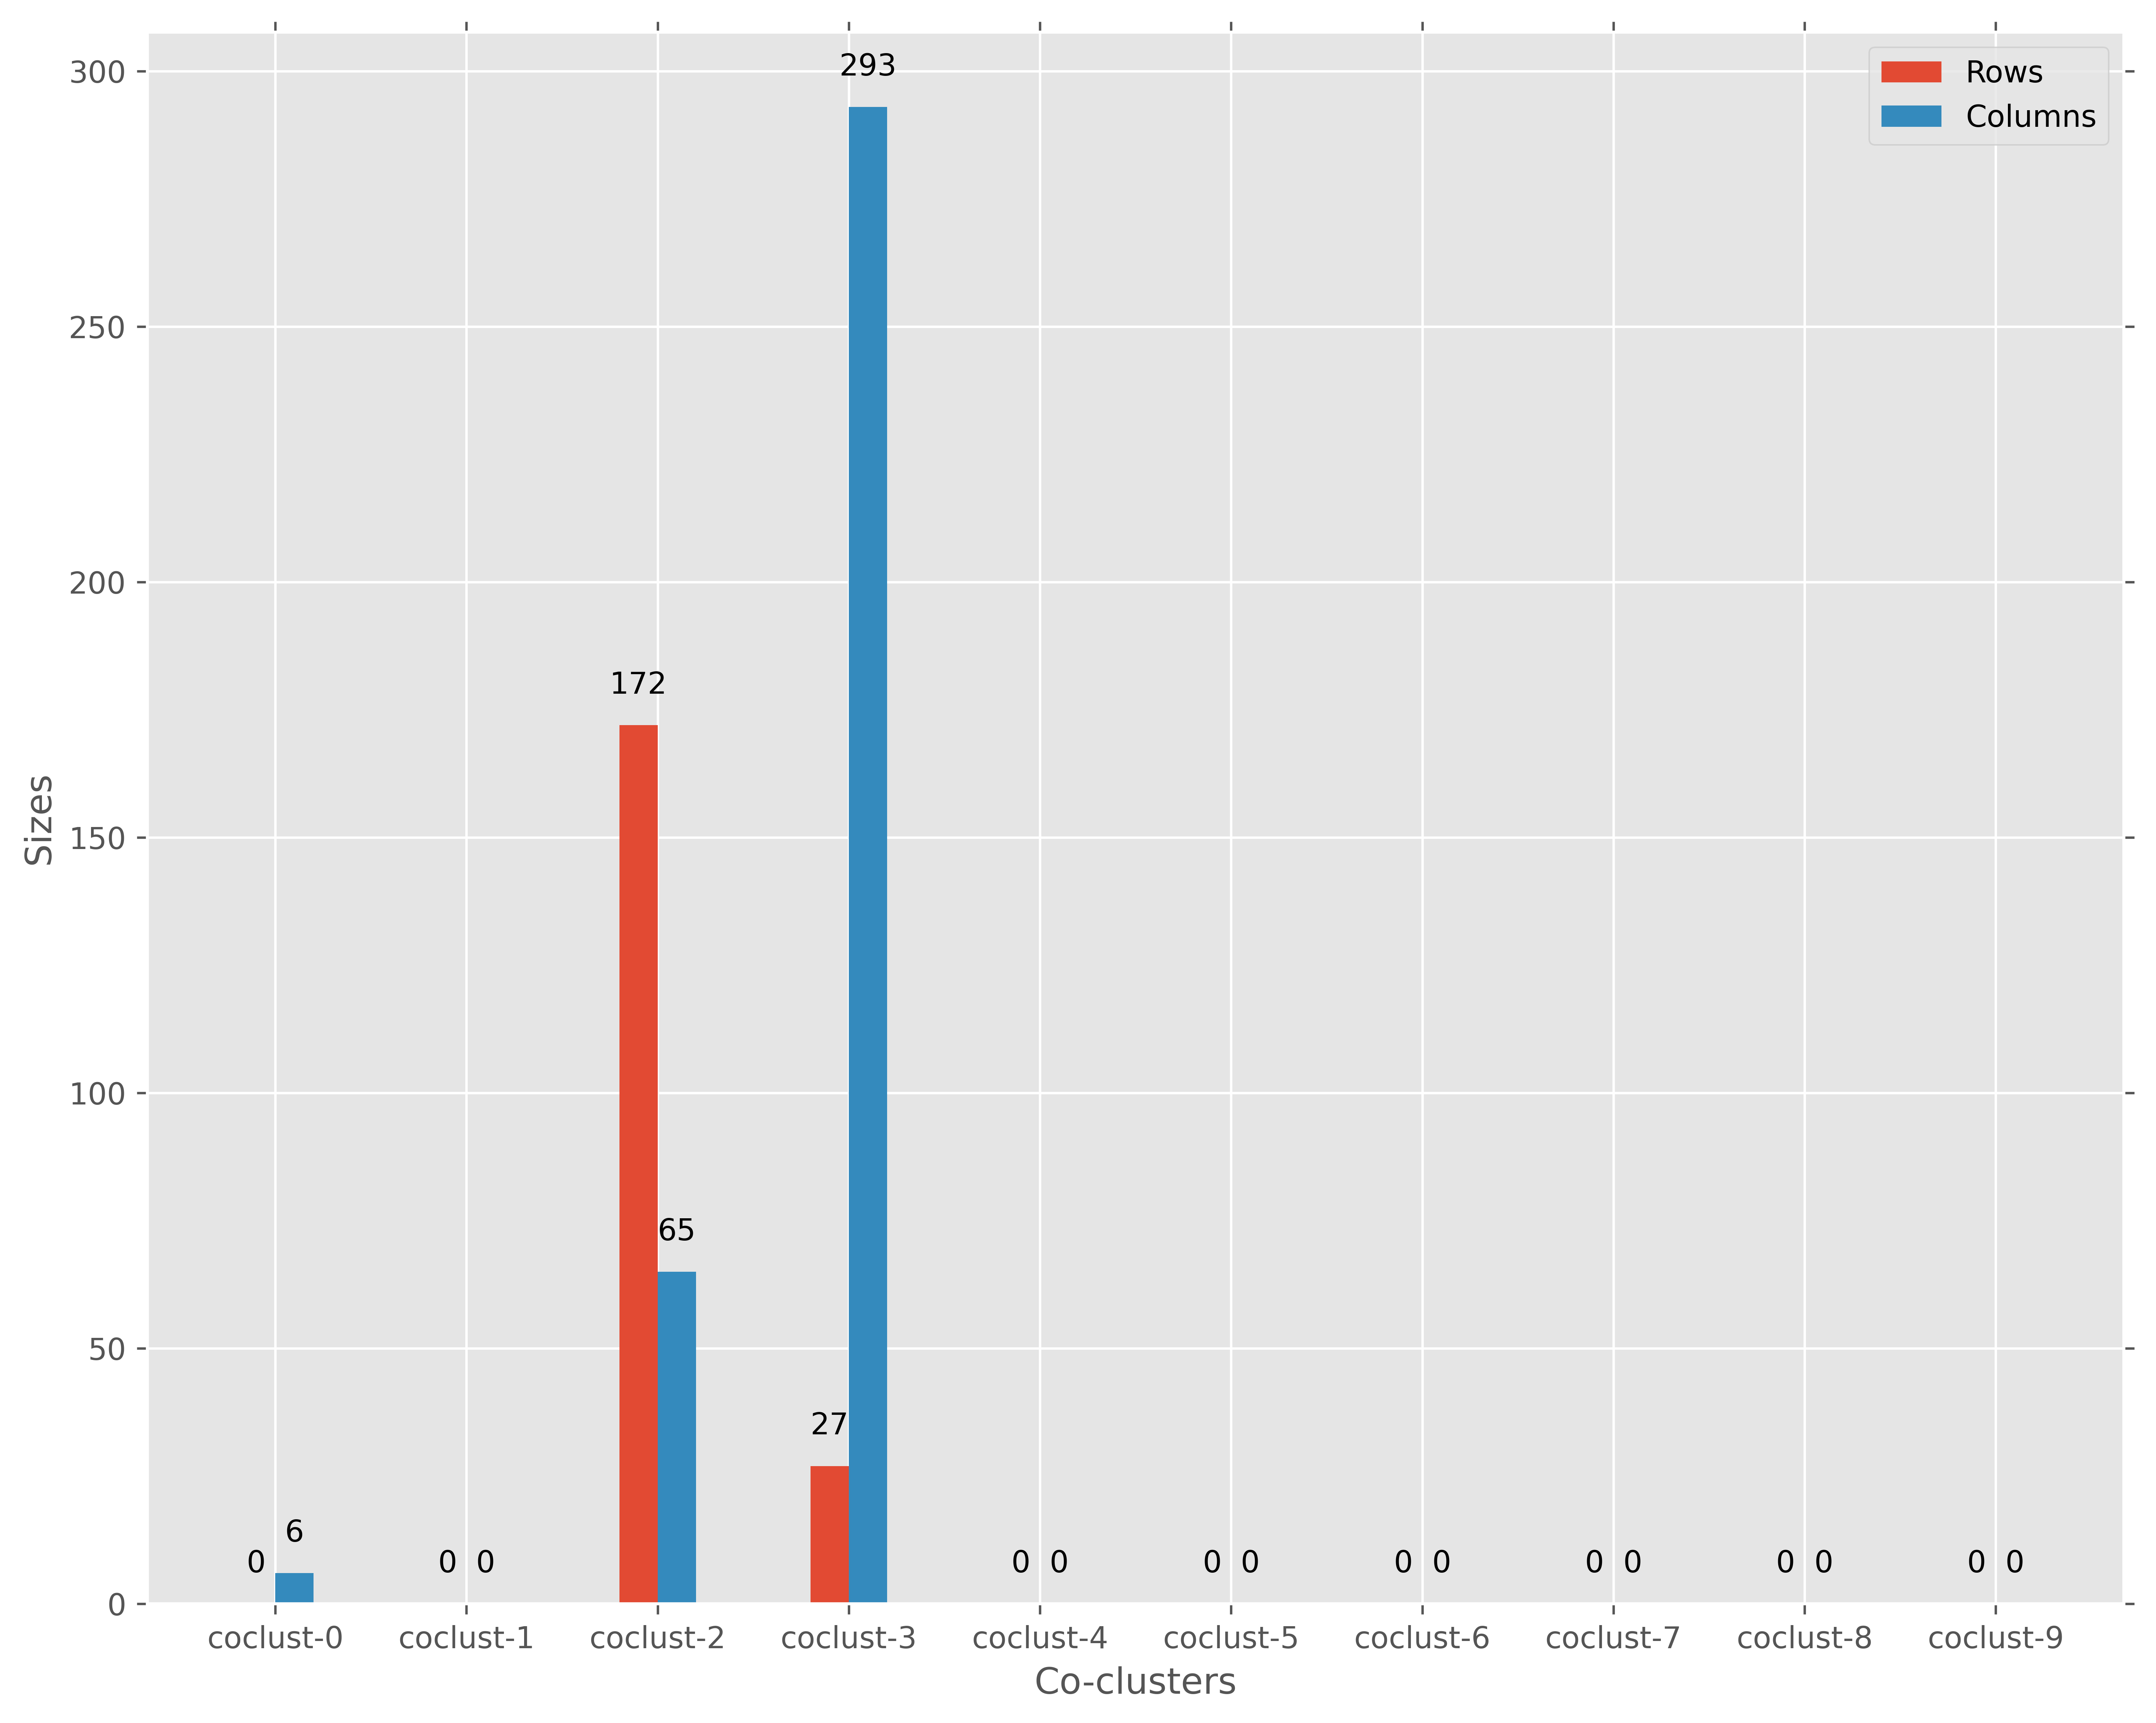

In [16]:
matplotlib.rcParams['figure.figsize'] = [5, 5] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 600 #width, height (both in inches)
plot_cluster_sizes(model)

In [17]:
np.unique(np.array(predicted_row_labels), return_counts=True)

(array([2, 3]), array([172,  27], dtype=int64))

In [18]:
ml_df_copy = ml_df.copy()
ml_df_copy['residues'] = resnums
ml_df_copy['row_cluster_labels'] = predicted_row_labels

In [21]:
ml_df_copy.loc[ml_df_copy['row_cluster_labels'] == 2]

7EW2_intenergysum 7EW3_intenergysum 7EW4_intenergysum 7EW1_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
194                 0                 0                 0                 0   
195                 0                 0                 0                 0   
196                 0                 0                 0                 0   
197               0.0               0.0               0.0               0.0   
198               0.0               0.0               0.0               0.0   

    7LD4_intenergysum 7LD3_intenergysum 7RM5_intenergysum 7M8W_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
194                 0                 0                 0                 0   
195                 0                 0                 0                 0   
196                 0                 0                 0                 0   
197               0.0               0.0               0.0               0.0   
198               0.0               0.0               0.0               0.0   

    7DB6_intenergysum 7EXD_intenergysum  ... 4XEE_intenergysum  \
0                 0.0               0.0  ...               0.0   
1                 0.0               0.0  ...               0.0   
2                 0.0               0.0  ...               0.0   
3                 0.0               0.0  ...               0.0   
4                 0.0               0.0  ...               0.0   
..                ...               ...  ...               ...   
194                 0                 0  ...                 0   
195                 0                 0  ...                 0   
196                 0                 0  ...                 0   
197               0.0               0.0  ...               0.0   
198               0.0               0.0  ...               0.0   

    4XES_intenergysum 4GRV_intenergysum 5C1M_intenergysum 4EJ4_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               NaN   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
194                 0                 0                 0                 0   
195                 0                 0                 0                 0   
196                 0                 0                 0                 0   
197               0.0               0.0               0.0               0.0   
198               0.0               0.0               0.0               0.0   

    4DKL_intenergysum 6Z10_intenergysum 6RNK_intenergysum residues  \
0                 0.0               0.0               0.0     1.32   
1                 0.0               0.0               0.0     1.33   
2                 0.0               0.0               0.0     1.34   
3                 0.0               0.0               0.0     1.35   
4             

In [22]:
ml_df_T = ml_df.transpose()

In [23]:
ml_df_T.columns = resnums

In [24]:
ml_df_T['label'] = predicted_column_labels

In [25]:
ml_df_T.loc[ml_df_T['label'] == 0]

1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.40 1.41  ... 7.46  \
7NA7_intenergysum  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  0.0  0.0  ...  0.0   
7FIG_intenergysum  NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
5T04_intenergysum  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4XEE_intenergysum  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4XES_intenergysum  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4GRV_intenergysum  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

                  7.47 7.48 7.49 7.50 7.51 7.52 7.53 7.54 label  
7NA7_intenergysum  0.0    0    0    0    0    0  0.0  0.0     0  
7FIG_intenergysum  0.0    0    0    0    0    0  0.0  0.0     0  
5T04_intenergysum  0.0    0    0    0    0    0  0.0  0.0     0  
4XEE_intenergysum  0.0    0    0    0    0    0  0.0  0.0     0  
4XES_intenergysum  0.0    0    0    0    0    0  0.0  0.0     0  
4GRV_intenergysum  0.0    0    0    0    0    0  0.0  0.0     0  

[6 rows x 200 columns]

In [26]:
np.unique(np.array(predicted_column_labels), return_counts=True)

(array([0, 2, 3]), array([  6,  65, 293], dtype=int64))

### Plotting Coclust Clustering

In [27]:
ml_df.fillna(999, inplace = True)

In [28]:
ml_df.dtypes

7EW2_intenergysum    float64
7EW3_intenergysum    float64
7EW4_intenergysum    float64
7EW1_intenergysum    float64
7LD4_intenergysum    float64
                      ...   
5C1M_intenergysum    float64
4EJ4_intenergysum    float64
4DKL_intenergysum    float64
6Z10_intenergysum    float64
6RNK_intenergysum    float64
Length: 364, dtype: object

In [29]:
len(ml_df)

199

In [30]:
len(resnums)

199

In [31]:
# determine where to place row lines
uniqs = np.unique(np.array(predicted_row_labels), return_counts=True)
line_count = 0
row_line_markers = []
for i in list(uniqs[1]):
    line_count += i
    row_line_markers.append(line_count)
    print(line_count)
    
print(row_line_markers)

172
199
[172, 199]


In [32]:
# determine where to place column lines
uniqs = np.unique(np.array(predicted_column_labels), return_counts=True)
line_count = 0
col_line_markers = []
for i in list(uniqs[1]):
    line_count += i
    col_line_markers.append(line_count)
    print(line_count)
    
print(col_line_markers)

6
71
364
[6, 71, 364]


In [33]:
PDBids = []

for col in ml_df.columns:
    PDBids.append(col[:4])

<Figure size 15000x15000 with 0 Axes>

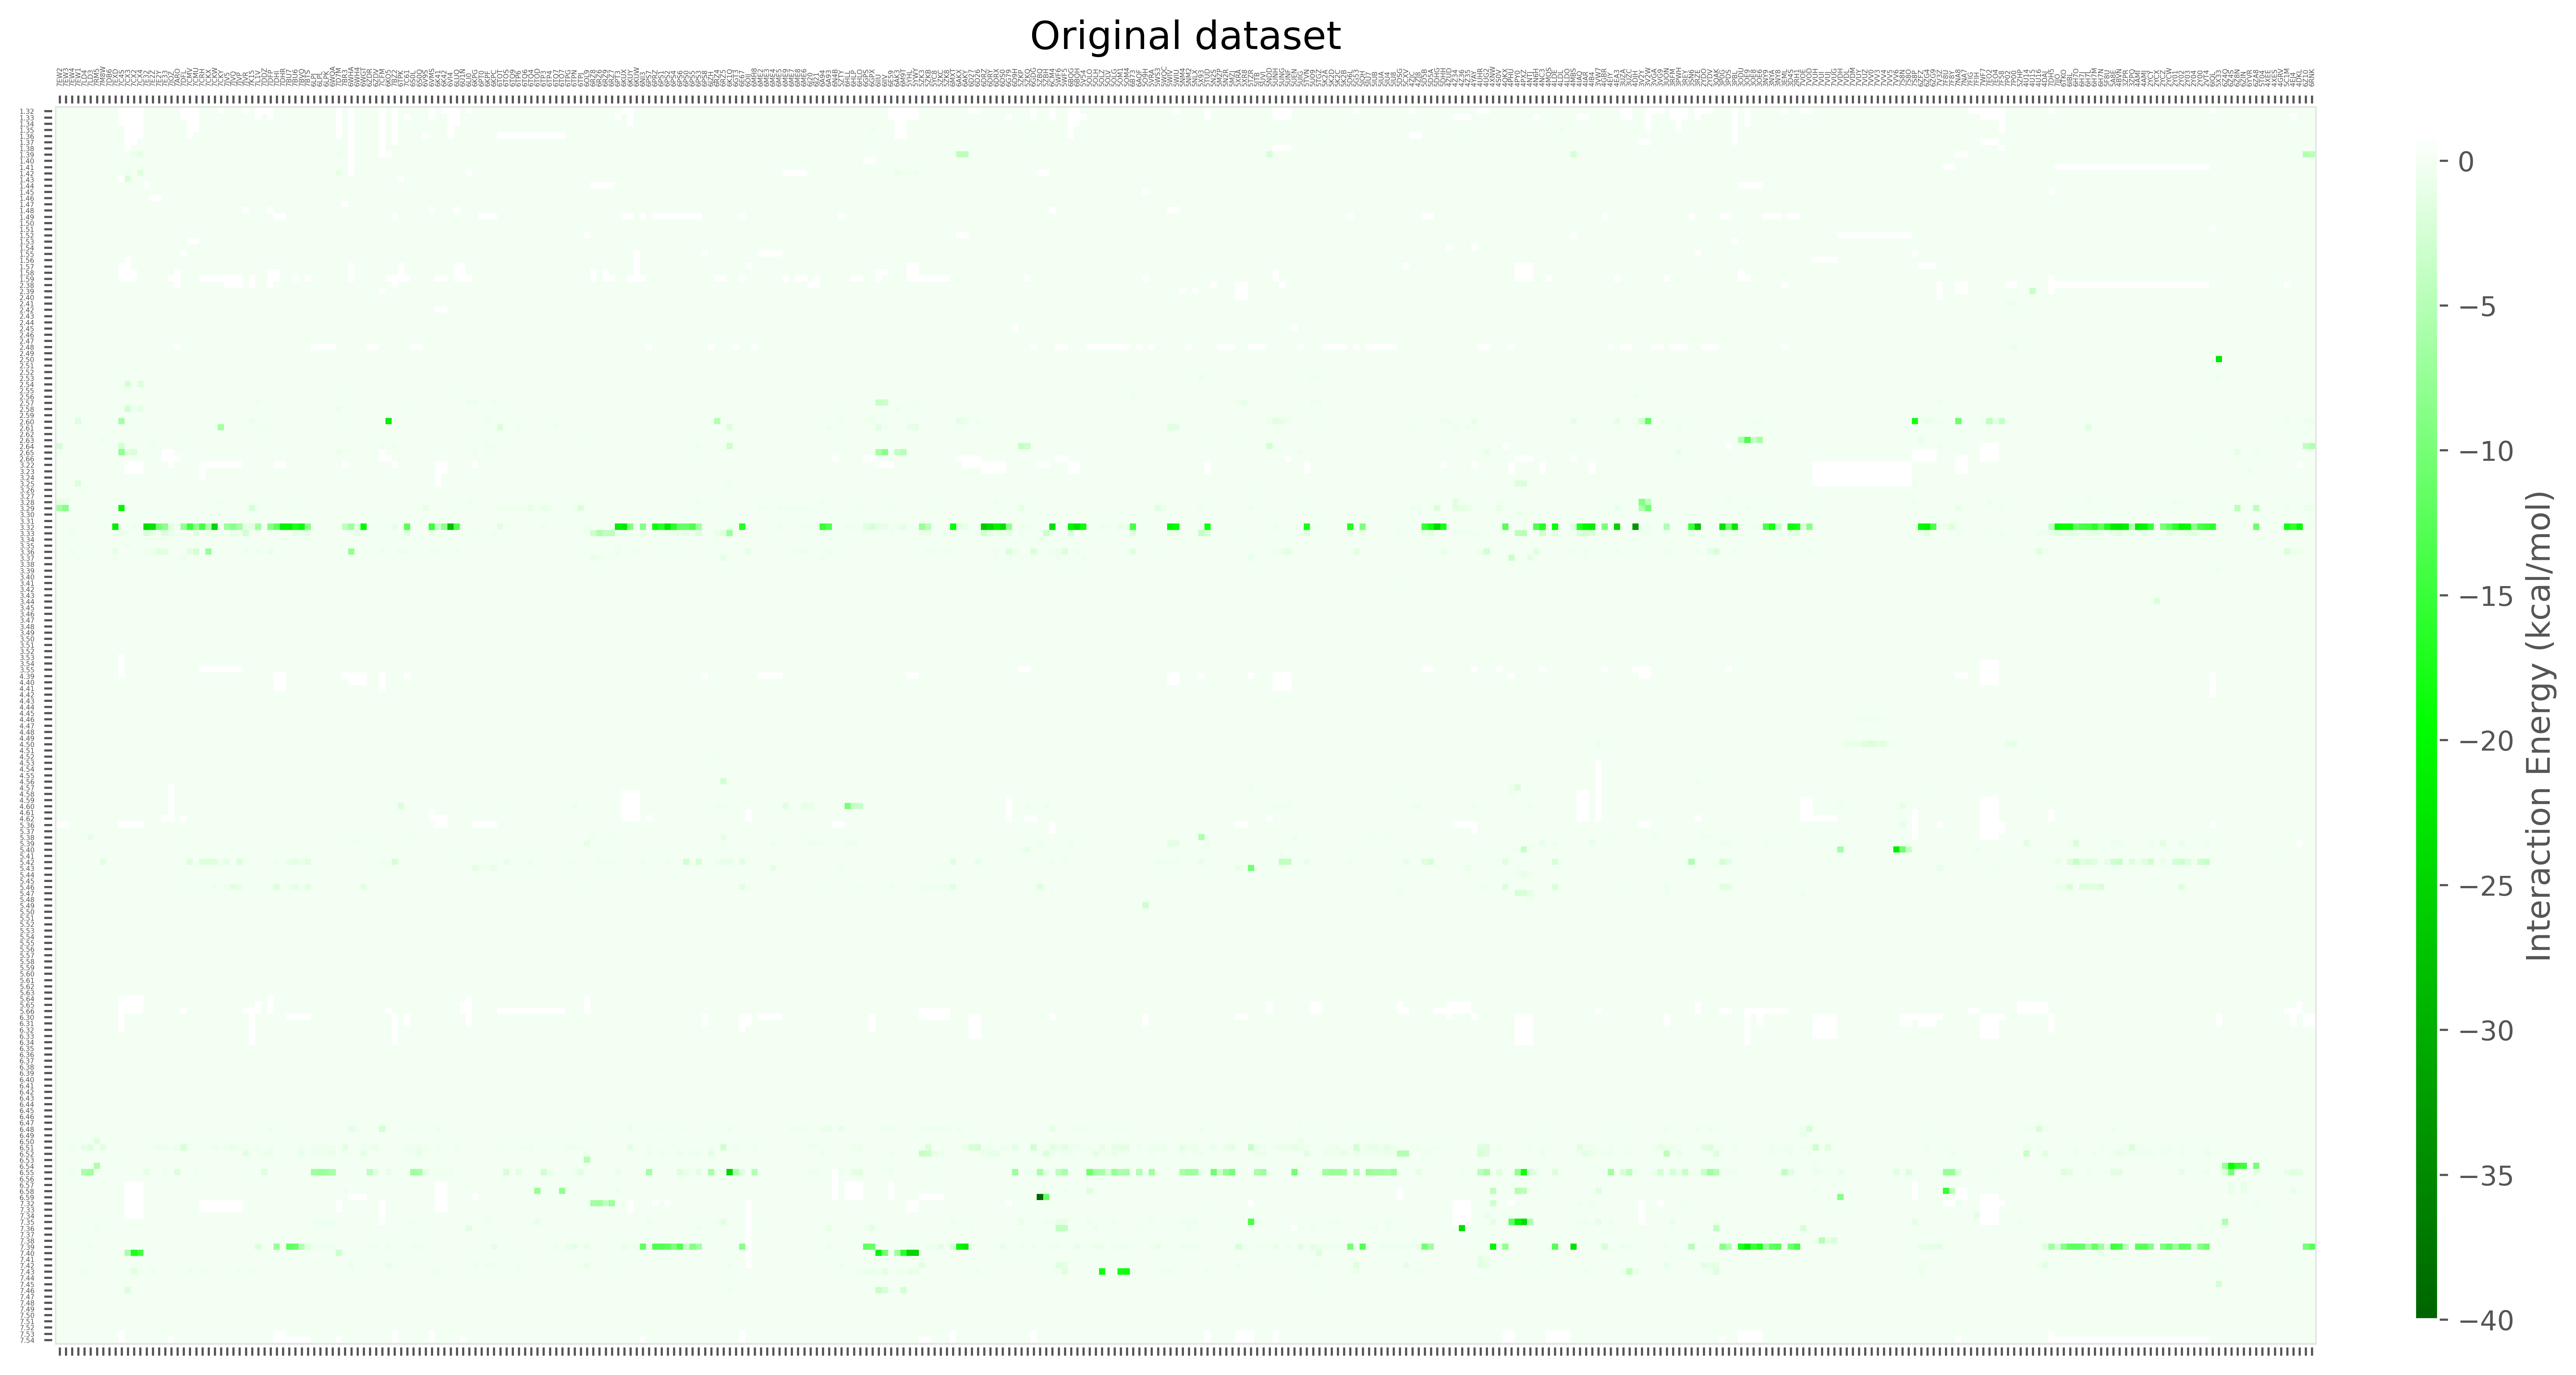

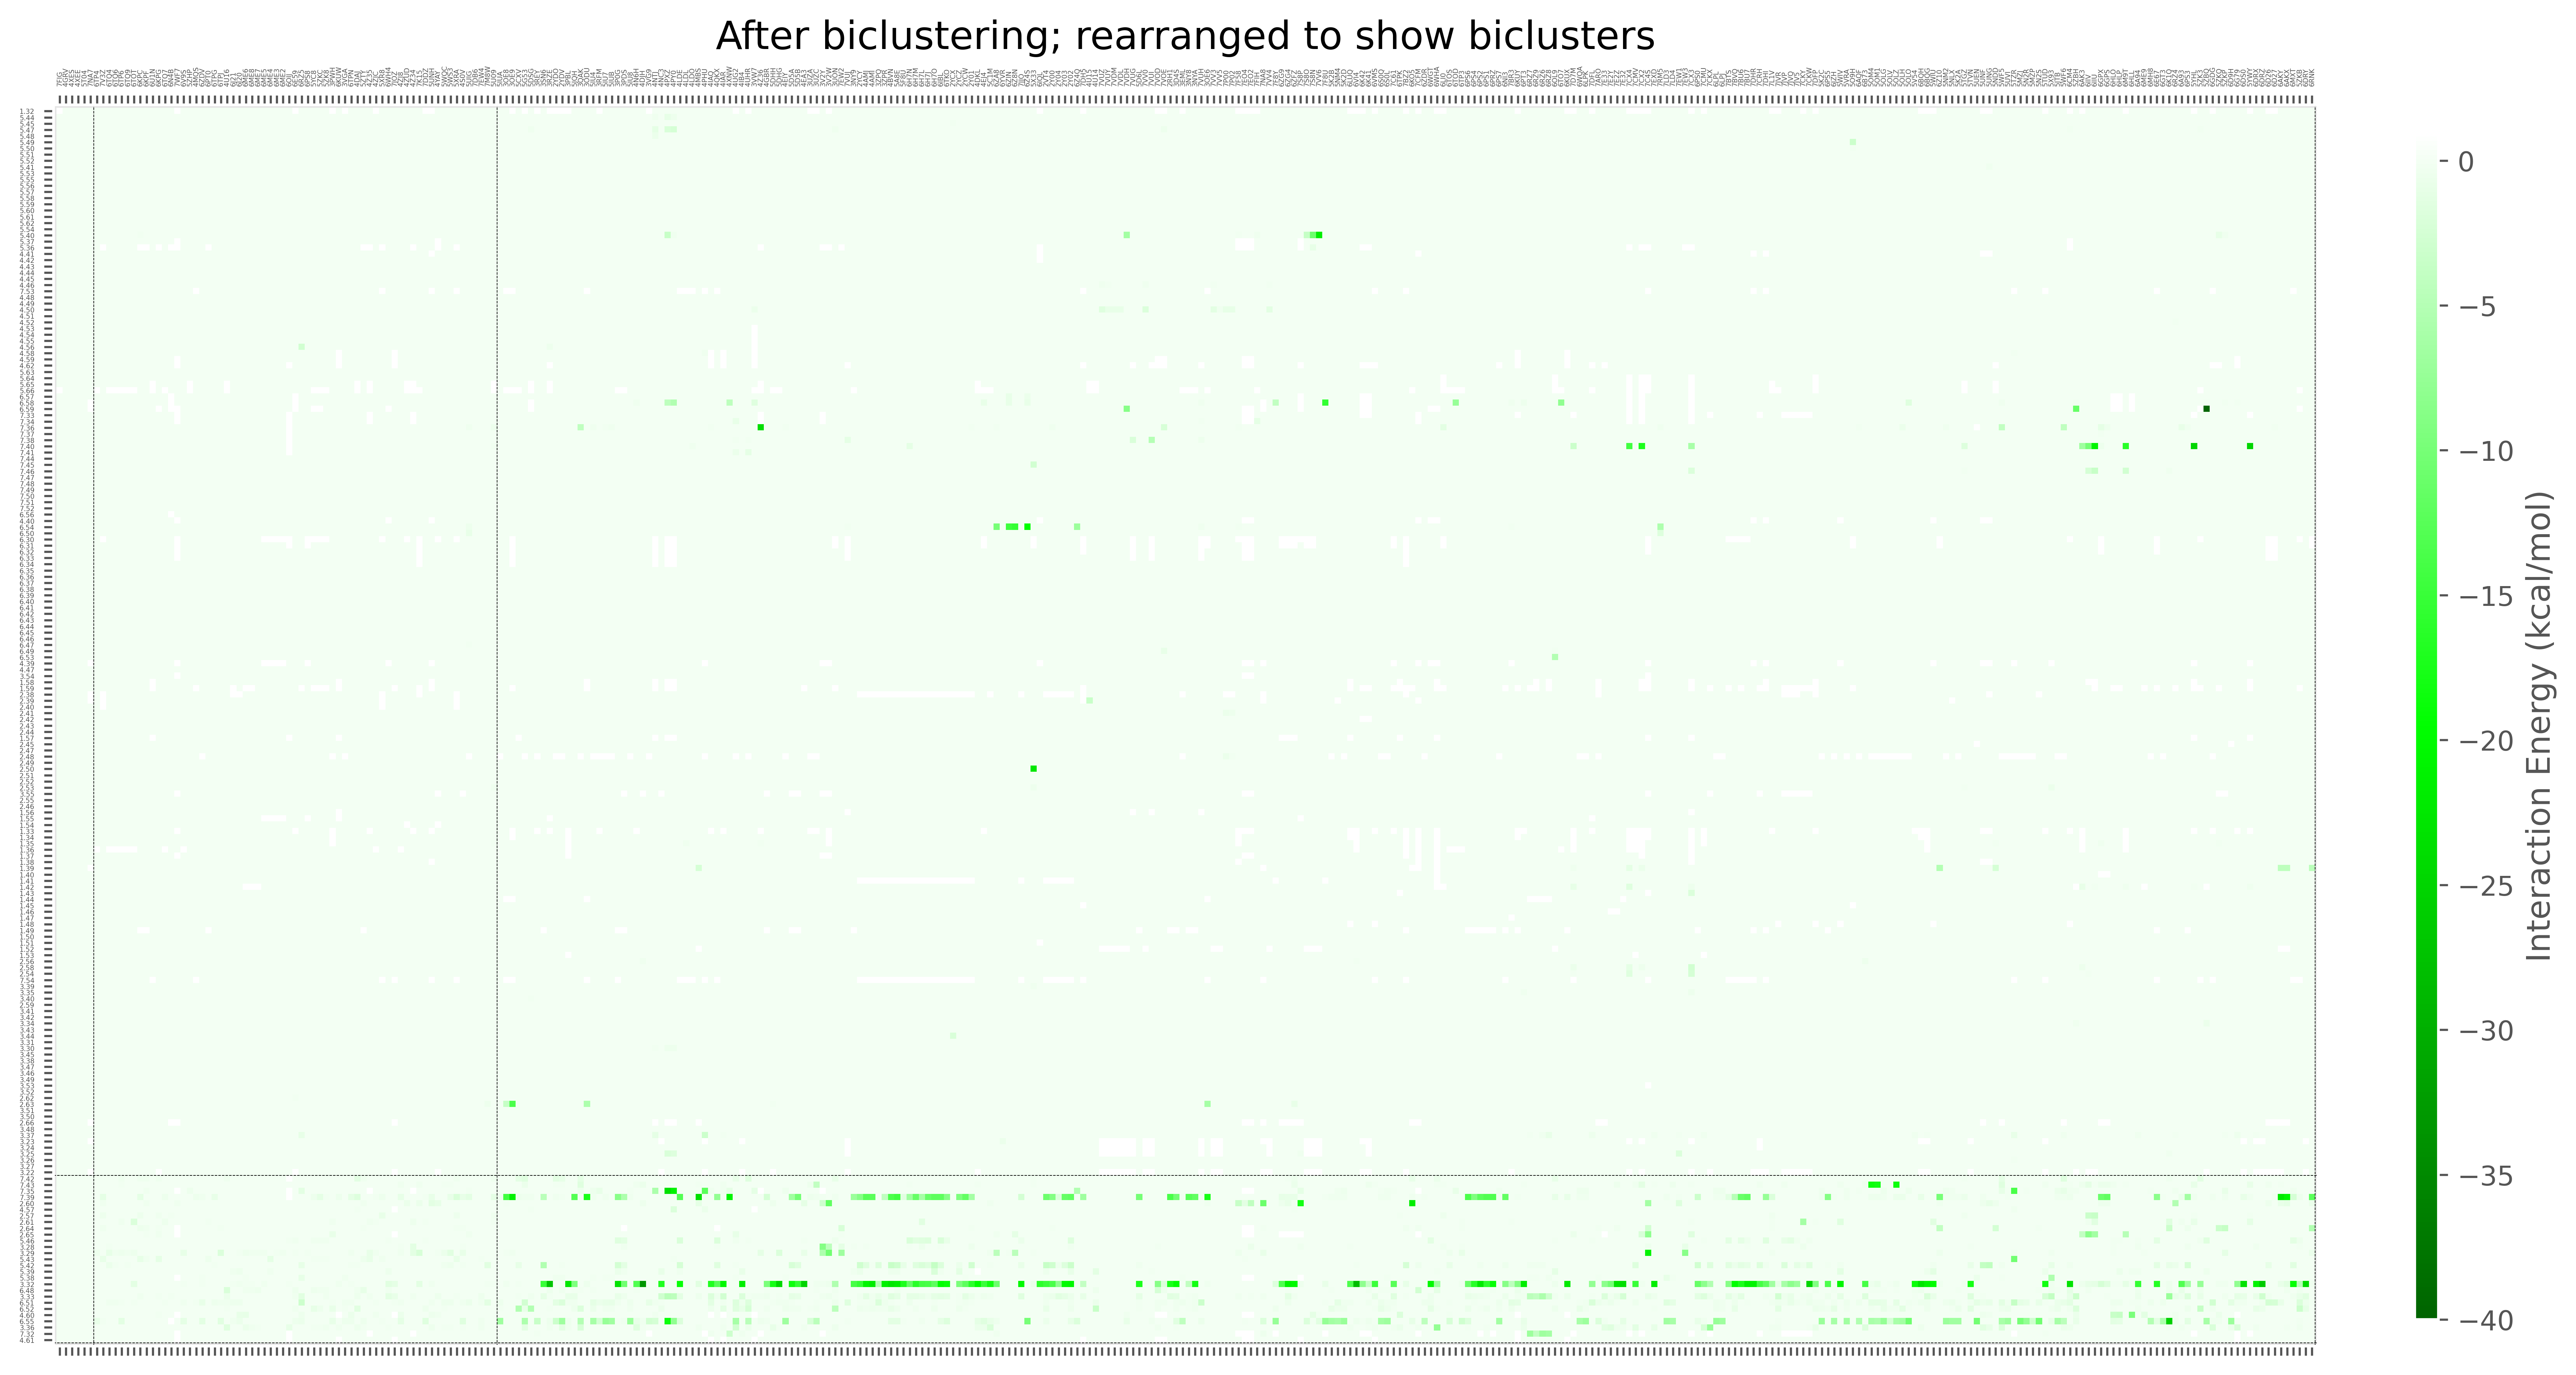

In [34]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


matplotlib.rcParams['figure.figsize'] = [25, 25] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 600 #width, height (both in inches)
fig = plt.figure(figsize=(25, 25), dpi = 600)

# convert some variables to numpy arrays for sorting
ml_df_np = ml_df.to_numpy()
X_np = X.to_numpy()
PDBids_np = np.array(PDBids)
resnums_np = np.array(resnums)

# Original Dataset Plot
#plt.gcf().set_size_inches(75, 75)
#plt.gcf().set_dpi(300)
norm= plt.Normalize(-40,1)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["darkgreen","lime","white"])
plt.matshow(ml_df, cmap=cmap, norm=norm)
ratio = X.shape[0]/X.shape[1]
cbar = plt.colorbar(fraction=0.04*ratio, pad = 0.04, aspect = 50, shrink = 0.9)
cbar.set_label('Interaction Energy (kcal/mol)', rotation=90)
plt.yticks(np.arange(len(y)), resnums, fontsize = 2.5)
plt.xticks(np.arange(len(X.columns)), PDBids, fontsize = 2.5, rotation = 90)

# # Gridlines
# plt.gca().set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor='true')
# plt.gca().set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor='true')
# plt.grid(which='minor', color = 'white', linewidth = 0.1)

# for i in range(len(resnums)):
#     plt.axhline(y= i + 0.5, color='white', linestyle='-', linewidth = 0.1)
    
# for i in range(len(PDBids)):
#     plt.axhline(y= i + 0.5, color='white', linestyle='-', linewidth = 0.1)

plt.ylim([-1,len(resnums)])
plt.xlim([-1,len(PDBids)])
plt.gca().invert_yaxis()
plt.title("Original dataset")
plt.grid(None)
# plt.savefig('plots/allresidues_biclustering_10clusters_original.png')

plt.show()

# Biclustering Arranged Plot

fit_data = ml_df_np[np.argsort(predicted_row_labels)]
fit_data = fit_data[:, np.argsort(predicted_column_labels)]

plt.matshow(fit_data, cmap=cmap, norm=norm)
ratio = X.shape[0]/X.shape[1]
cbar = plt.colorbar(fraction=0.04*ratio, pad = 0.04, aspect = 50, shrink = 0.9)
cbar.set_label('Interaction Energy (kcal/mol)', rotation=90)
plt.yticks(np.arange(len(y)), list(resnums_np[np.argsort(predicted_row_labels)]), fontsize = 2.5)
plt.xticks(np.arange(len(X.columns)), list(PDBids_np[np.argsort(predicted_column_labels)]), fontsize = 2.5, rotation = 90)

# column lines
for i in col_line_markers:
     plt.axvline(x = i - 0.5, color='black', linestyle='dashed', linewidth = 0.25)
        
# row lines
for i in row_line_markers:
     plt.axhline(y = i - 0.5, color='black', linestyle='dashed', linewidth = 0.25)


plt.ylim([-1,len(resnums)])
plt.xlim([-1,len(PDBids)])
plt.gca().invert_yaxis()
plt.title("After biclustering; rearranged to show biclusters")
plt.grid(None) 
# plt.savefig('plots/allresidues_biclustering_10clusters_rearranged.png')

plt.show()